In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import category_encoders as ce
import os
import pickle
import gc
from tqdm import tqdm
from sklearn.model_selection import ShuffleSplit

Using TensorFlow backend.


In [2]:
def encode_text_features(encode_decode, data_frame, encoder_isa=None, encoder_mem_type=None):
    # Implement Categorical OneHot encoding for ISA and mem-type
    if encode_decode == 'encode':
        encoder_isa = ce.one_hot.OneHotEncoder(cols=['isa'])
        encoder_mem_type = ce.one_hot.OneHotEncoder(cols=['mem-type'])
        encoder_isa.fit(data_frame, verbose=1)
        df_new1 = encoder_isa.transform(data_frame)
        encoder_mem_type.fit(df_new1, verbose=1)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
    else:
        df_new1 = encoder_isa.transform(data_frame)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
        
    return encoded_data_frame, encoder_isa, encoder_mem_type

In [1]:
df = pd.read_csv('\\Dataset_CSV\\Simulator\\dijkstra.csv')

NameError: name 'pd' is not defined

In [4]:
df.head()

arch  cpu-clock     isa  l1d_assoc  \
0  IntelCorei97900X_DDR42666_2GB        3.3  X86_64          8   
1  IntelCorei97900X_DDR42666_3GB        3.3  X86_64          8   
2  IntelCorei97900X_DDR42666_4GB        3.3  X86_64          8   
3  IntelCorei97900X_DDR42666_6GB        3.3  X86_64          8   
4  IntelCorei97900X_DDR42666_7GB        3.3  X86_64          8   

   l1d_cache_lines  l1d_shared_by_threads  l1d_size  l2_assoc  l2_cache_lines  \
0               64                      1        32        16              64   
1               64                      1        32        16              64   
2               64                      1        32        16              64   
3               64                      1        32        16              64   
4               64                      1        32        16              64   

   l2_shared_by_threads  ...  l3_cache_lines  l3_shared_by_threads  l3_size  \
0                     1  ...              64                    10       16   
1                     1  ...              64                    10       16   
2                     1  ...              64                    10       16   
3                     1  ...              64                    10       16   
4                     1  ...              64                    10       16   

   mem-size  mem-type  mem_clock num-cpus                              arch1  \
0         2      DDR4       2666       10  IntelCorei97900X_DDR42666_2GB_100   
1         3      DDR4       2666       10  IntelCorei97900X_DDR42666_3GB_100   
2         4      DDR4       2666       10  IntelCorei97900X_DDR42666_4GB_100   
3         6      DDR4       2666       10  IntelCorei97900X_DDR42666_6GB_100   
4         7      DDR4       2666       10  IntelCorei97900X_DDR42666_7GB_100   

    PS runtime  
0  100   25523  
1  100   25523  
2  100   25523  
3  100   25523  
4  100   25523  

[5 rows x 22 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 22 columns):
arch                     475 non-null object
cpu-clock                475 non-null float64
isa                      475 non-null object
l1d_assoc                475 non-null int64
l1d_cache_lines          475 non-null int64
l1d_shared_by_threads    475 non-null int64
l1d_size                 475 non-null int64
l2_assoc                 475 non-null int64
l2_cache_lines           475 non-null int64
l2_shared_by_threads     475 non-null int64
l2_size                  475 non-null int64
l3_assoc                 475 non-null int64
l3_cache_lines           475 non-null int64
l3_shared_by_threads     475 non-null int64
l3_size                  475 non-null int64
mem-size                 475 non-null int64
mem-type                 475 non-null object
mem_clock                475 non-null int64
num-cpus                 475 non-null int64
arch1                    475 non-null object
PS       

In [6]:
df.columns, len(df.columns)

(Index(['arch', 'cpu-clock', 'isa', 'l1d_assoc', 'l1d_cache_lines',
        'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
        'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
        'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type', 'mem_clock',
        'num-cpus', 'arch1', 'PS', 'runtime'],
       dtype='object'), 22)

In [7]:
len(df)

475

In [8]:
encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, encoder_isa = None, encoder_mem_type=None)

In [9]:
encoded_data_frame.head()

arch  cpu-clock  isa_1  isa_2  l1d_assoc  \
0  IntelCorei97900X_DDR42666_2GB        3.3      1      0          8   
1  IntelCorei97900X_DDR42666_3GB        3.3      1      0          8   
2  IntelCorei97900X_DDR42666_4GB        3.3      1      0          8   
3  IntelCorei97900X_DDR42666_6GB        3.3      1      0          8   
4  IntelCorei97900X_DDR42666_7GB        3.3      1      0          8   

   l1d_cache_lines  l1d_shared_by_threads  l1d_size  l2_assoc  l2_cache_lines  \
0               64                      1        32        16              64   
1               64                      1        32        16              64   
2               64                      1        32        16              64   
3               64                      1        32        16              64   
4               64                      1        32        16              64   

   ...  mem-size  mem-type_1  mem-type_2  mem-type_3  mem-type_4  mem_clock  \
0  ...         2           1           0           0           0       2666   
1  ...         3           1           0           0           0       2666   
2  ...         4           1           0           0           0       2666   
3  ...         6           1           0           0           0       2666   
4  ...         7           1           0           0           0       2666   

   num-cpus                              arch1   PS  runtime  
0        10  IntelCorei97900X_DDR42666_2GB_100  100    25523  
1        10  IntelCorei97900X_DDR42666_3GB_100  100    25523  
2        10  IntelCorei97900X_DDR42666_4GB_100  100    25523  
3        10  IntelCorei97900X_DDR42666_6GB_100  100    25523  
4        10  IntelCorei97900X_DDR42666_7GB_100  100    25523  

[5 rows x 26 columns]

In [10]:
encoded_data_frame.columns

Index(['arch', 'cpu-clock', 'isa_1', 'isa_2', 'l1d_assoc', 'l1d_cache_lines',
       'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
       'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
       'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type_1',
       'mem-type_2', 'mem-type_3', 'mem-type_4', 'mem_clock', 'num-cpus',
       'arch1', 'PS', 'runtime'],
      dtype='object')

In [11]:
total_data = encoded_data_frame.drop(columns = ['arch', 'arch1'])

In [12]:
total_data.columns

Index(['cpu-clock', 'isa_1', 'isa_2', 'l1d_assoc', 'l1d_cache_lines',
       'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
       'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
       'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type_1',
       'mem-type_2', 'mem-type_3', 'mem-type_4', 'mem_clock', 'num-cpus', 'PS',
       'runtime'],
      dtype='object')

In [13]:
total_data = total_data.fillna(0)

In [14]:
X_columns = total_data.drop(columns = 'PS').columns
X = total_data.drop(columns = ['runtime','PS']).to_numpy()
Y = total_data['runtime'].to_numpy()

In [15]:
X.shape, Y.shape

((475, 22), (475,))

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((380, 22), (95, 22), (380,), (95,))

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
# Y_train = scaler.fit_transform(Y_train)
# Y_test = scaler.fit_transform(Y_test)

# Histogram Visualization of Dataset

C:\Users\Rajat\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Rajat\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Rajat\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Rajat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until

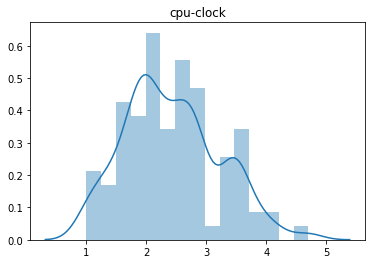

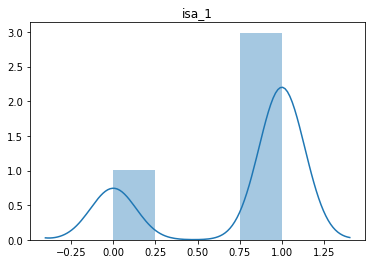

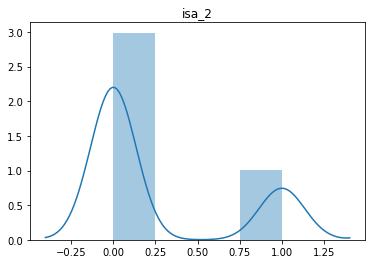

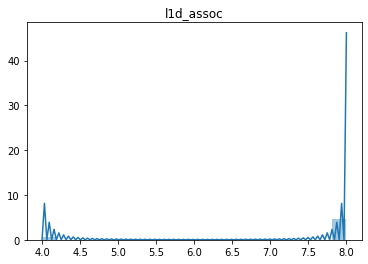

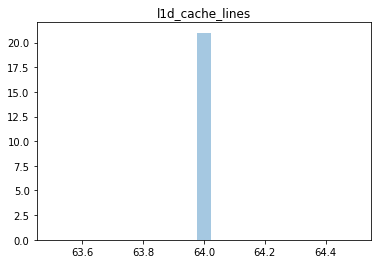

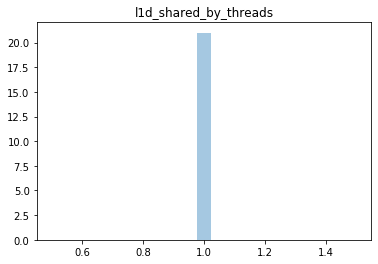

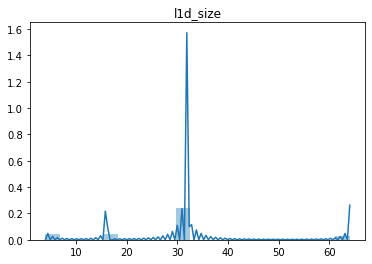

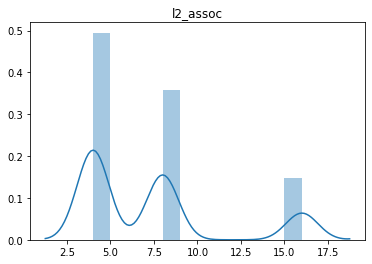

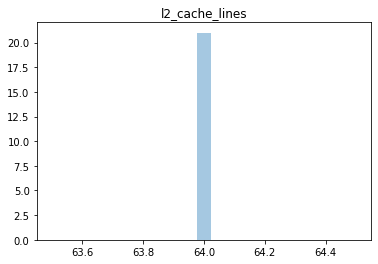

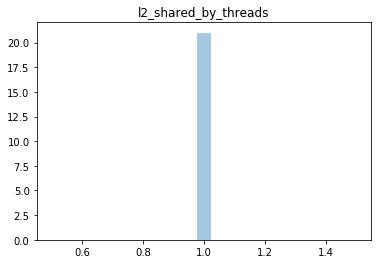

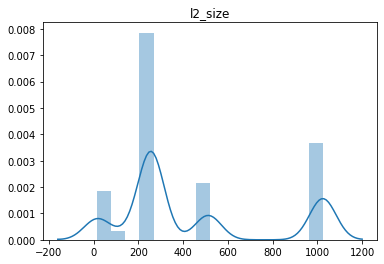

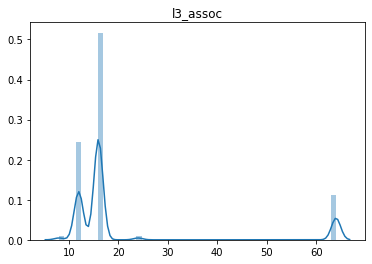

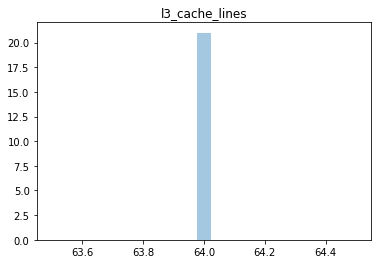

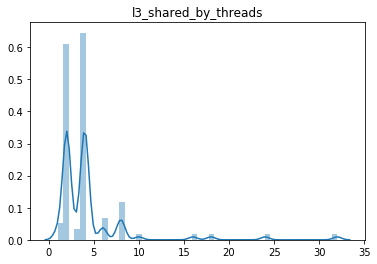

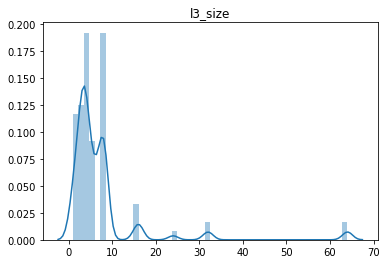

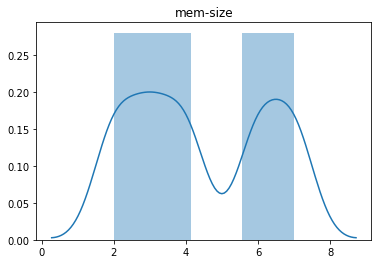

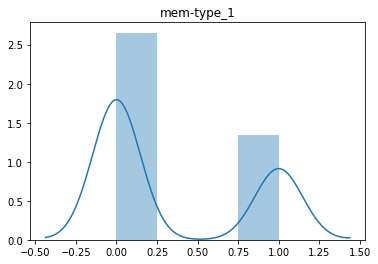

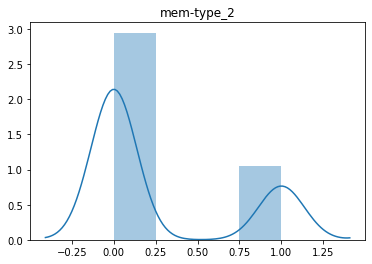

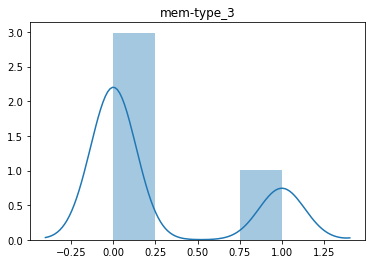

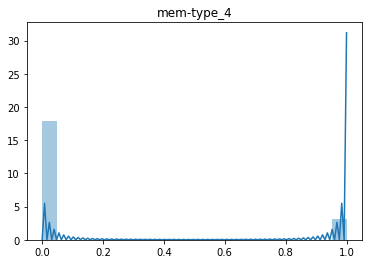

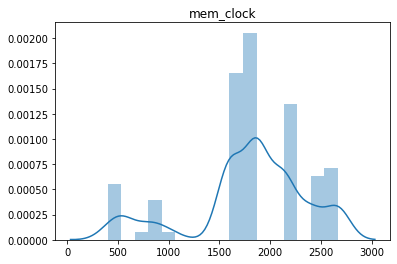

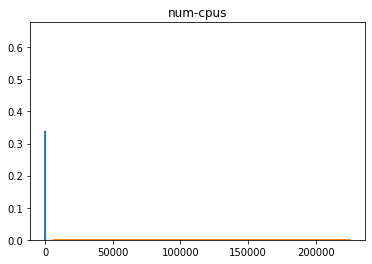

In [20]:
for i in range(X.shape[1]):
    plt.figure()
    plt.title(X_columns[i])
    sns.distplot(X[:,i]) # Also plots Gaussian KDE over data
sns.distplot(Y)

# Understanding Correlations

In [21]:
total_data.head(100)

cpu-clock  isa_1  isa_2  l1d_assoc  l1d_cache_lines  \
0         3.3      1      0          8               64   
1         3.3      1      0          8               64   
2         3.3      1      0          8               64   
3         3.3      1      0          8               64   
4         3.3      1      0          8               64   
..        ...    ...    ...        ...              ...   
95        2.8      1      0          8               64   
96        2.8      1      0          8               64   
97        2.8      1      0          8               64   
98        2.8      1      0          8               64   
99        2.8      1      0          8               64   

    l1d_shared_by_threads  l1d_size  l2_assoc  l2_cache_lines  \
0                       1        32        16              64   
1                       1        32        16              64   
2                       1        32        16              64   
3                       1        32        16              64   
4                       1        32        16              64   
..                    ...       ...       ...             ...   
95                      1        32         4              64   
96                      1        32         4              64   
97                      1        32         4              64   
98                      1        32         4              64   
99                      1        32         4              64   

    l2_shared_by_threads  ...  l3_size  mem-size  mem-type_1  mem-type_2  \
0                      1  ...       16         2           1           0   
1                      1  ...       16         3           1           0   
2                      1  ...       16         4           1           0   
3                      1  ...       16         6           1           0   
4                      1  ...       16         7           1           0   
..                   ...  ...      ...       ...         ...         ...   
95                     1  ...        8         2           1           0   
96                     1  ...        8         3           1           0   
97                     1  ...        8         4           1           0   
98                     1  ...        8         6           1           0   
99                     1  ...        8         7           1           0   

    mem-type_3  mem-type_4  mem_clock  num-cpus   PS  runtime  
0            0           0       2666        10  100    25523  
1            0           0       2666        10  100    25523  
2            0           0       2666        10  100    25523  
3            0           0       2666        10  100    25523  
4            0           0       2666        10  100    25523  
..         ...         ...        ...       ...  ...      ...  
95           0           0       2133         4  100    30014  
96           0           0       2133         4  100    30014  
97           0           0       2133         4  100    30014  
98           0           0       2133         4  100    30014  
99           0           0       2133         4  100    30014  

[100 rows x 24 columns]

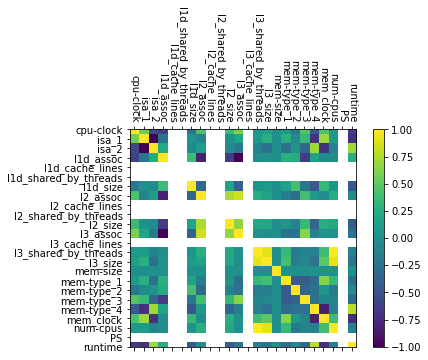

<Figure size 1440x1080 with 0 Axes>

In [22]:
train_data = total_data
correlations = train_data.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,24,1)
#ticks = np.arange(0,12,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(train_data.columns, rotation = -90)
ax.set_yticklabels(train_data.columns)
plt.figure(figsize=(20,15))
plt.show()

In [23]:
correlations

cpu-clock         isa_1         isa_2     l1d_assoc  \
cpu-clock              1.000000e+00  5.683305e-01 -5.683305e-01 -6.046588e-01   
isa_1                  5.683305e-01  1.000000e+00 -1.000000e+00 -2.210691e-01   
isa_2                 -5.683305e-01 -1.000000e+00  1.000000e+00  2.210691e-01   
l1d_assoc             -6.046588e-01 -2.210691e-01  2.210691e-01  1.000000e+00   
l1d_cache_lines                 NaN           NaN           NaN           NaN   
l1d_shared_by_threads           NaN           NaN           NaN           NaN   
l1d_size              -2.153690e-01  2.507716e-02 -2.507716e-02  3.610983e-01   
l2_assoc               4.337730e-01 -1.137922e-01  1.137922e-01 -8.186160e-01   
l2_cache_lines                  NaN           NaN           NaN           NaN   
l2_shared_by_threads            NaN           NaN           NaN           NaN   
l2_size                3.652752e-01  2.536103e-02 -2.536103e-02 -6.446529e-01   
l3_assoc               5.949016e-01  1.868760e-01 -1.868760e-01 -9.919651e-01   
l3_cache_lines                  NaN           NaN           NaN           NaN   
l3_shared_by_threads   7.685762e-02  9.518434e-02 -9.518434e-02 -1.315304e-02   
l3_size                1.220742e-01  2.522195e-01 -2.522195e-01  9.322484e-03   
mem-size              -1.758110e-17 -4.002260e-17  4.002260e-17 -7.586847e-18   
mem-type_1             8.256418e-02  2.605956e-01 -2.605956e-01  2.709919e-01   
mem-type_2            -1.982461e-01 -3.764086e-02  3.764086e-02  2.272336e-01   
mem-type_3             4.575518e-01  3.380282e-01 -3.380282e-01 -6.539961e-01   
mem-type_4            -4.246905e-01 -7.150642e-01  7.150642e-01  1.580786e-01   
mem_clock              4.288629e-01  7.103812e-01 -7.103812e-01 -2.905351e-02   
num-cpus               7.685762e-02  9.518434e-02 -9.518434e-02 -1.315304e-02   
PS                              NaN           NaN           NaN           NaN   
runtime               -6.282612e-01 -7.050922e-01  7.050922e-01  2.638814e-01   

                       l1d_cache_lines  l1d_shared_by_threads      l1d_size  \
cpu-clock                          NaN                    NaN -2.153690e-01   
isa_1                              NaN                    NaN  2.507716e-02   
isa_2                              NaN                    NaN -2.507716e-02   
l1d_assoc                          NaN                    NaN  3.610983e-01   
l1d_cache_lines                    NaN                    NaN           NaN   
l1d_shared_by_threads              NaN                    NaN           NaN   
l1d_size                           NaN                    NaN  1.000000e+00   
l2_assoc                           NaN                    NaN -3.281118e-01   
l2_cache_lines                     NaN                    NaN           NaN   
l2_shared_by_threads               NaN                    NaN           NaN   
l2_size                            NaN                    NaN  1.660072e-01   
l3_assoc                           NaN                    NaN -3.749164e-01   
l3_cache_lines                     NaN                    NaN           NaN   
l3_shared_by_threads               NaN                    NaN  3.319703e-02   
l3_size                            NaN                    NaN  7.598079e-02   
mem-size                           NaN                    NaN  1.491539e-17   
mem-type_1                         NaN                    NaN  1.501645e-01   
mem-type_2                         NaN                    NaN  4.102332e-01   
mem-type_3                         NaN                    NaN -2.148203e-01   
mem-type_4                         NaN                    NaN -4.465037e-01   
mem_clock                          NaN                    NaN  3.385585e-01   
num-cpus                           NaN                    NaN  3.319703e-02   
PS                                 NaN                    NaN           NaN   
runtime                            NaN                    NaN -4.336575e-01   

                        

In [19]:
def absolute_percentage_error(Y_test, Y_pred):
    error = 0
    for i in range(len(Y_test)):
        if(Y_test[i]!= 0 ):
            error = error + (abs(Y_test[i] - Y_pred[i]))/Y_test[i]
        
    error = error/ len(Y_test)
    return error

# 1. Support Vector Regressor + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.180, total=   0.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.126, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.053, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.180, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.126, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.053, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ...... C=0.1, gamma=0.01, kernel=rbf, score=-0.180, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ...... C=0.1, gamma=0.01, kernel=rbf, score=-0.126, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ...... C=0.1, gamma=0.01, kernel=rbf, score=-0.053, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.4s finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
MSE =  571978717.0421926
R2 score = 0.4251163219515798
Mean Absolute Percentage Error is: 0.12857637749561118
Mean Absolute Error is: 9946.011200147972


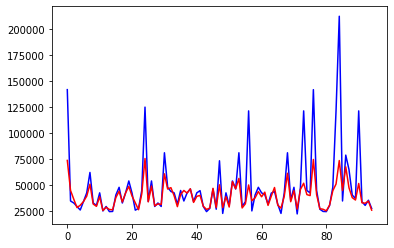

In [20]:
from sklearn.svm import SVR
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              # Regularization parameter. The strength of the regularization is inversely proportional to C. 
              # Must be strictly positive. The penalty is a squared l2 penalty.
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
              # if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
              # if ‘auto’, uses 1 / n_features.
              
              'kernel': ['rbf']} 
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred)) 
print('Mean Absolute Percentage Error is:',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))


# 10 fold cross validation for best SVR

ShuffleSplit(n_splits=10, random_state=0, test_size=None, train_size=None)
(427, 22) (48, 22) (427,) (48,)
(427, 22) (48, 22) (427,) (48,)
(427, 22) (48, 22) (427,) (48,)
(427, 22) (48, 22) (427,) (48,)
(427, 22) (48, 22) (427,) (48,)
(427, 22) (48, 22) (427,) (48,)
(427, 22) (48, 22) (427,) (48,)
(427, 22) (48, 22) (427,) (48,)
(427, 22) (48, 22) (427,) (48,)
(427, 22) (48, 22) (427,) (48,)
MSE for 10 folds
 [749395766.7481322, 1451581209.0029356, 324036273.06776965, 725739186.3433218, 1480024622.7092507, 1200124523.6276758, 1508366876.3138485, 860604534.4767715, 1186166919.2246704, 1012478146.9814129]

R2 scores for 10 folds
 [0.13377133309085687, 0.03088757029316347, 0.15673516994986125, 0.1308791251703295, -0.040487914527084, 0.01155018329424895, 0.022828253963892986, 0.07771919827926288, 0.042925364798443666, 0.07828910687815394]

MAPE for 10 folds
 [0.22622585613911664, 0.27469456583603985, 0.19935887674613142, 0.2654640242014522, 0.28830060304952004, 0.26155620050088163, 0.29026

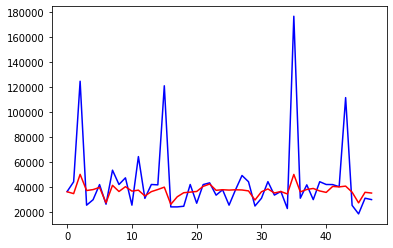

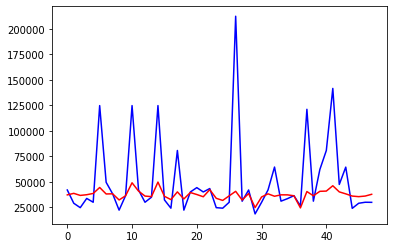

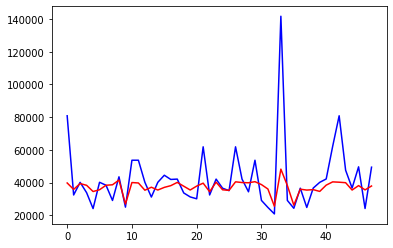

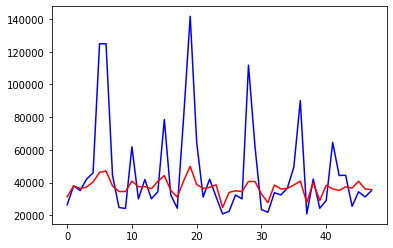

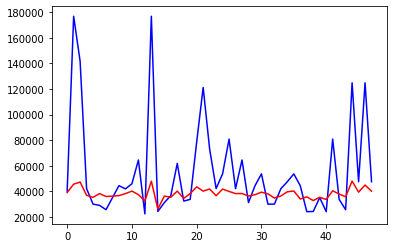

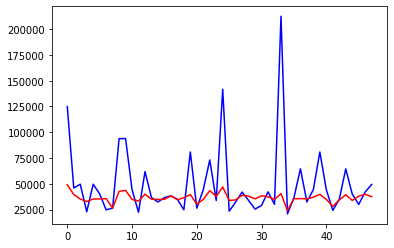

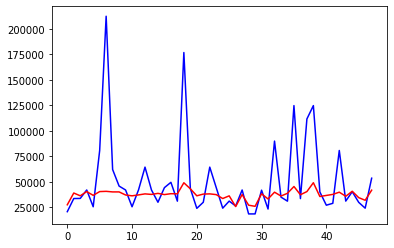

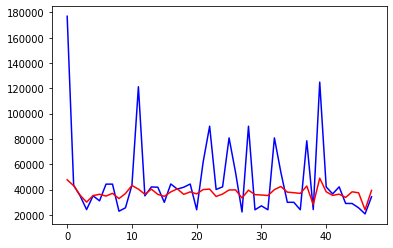

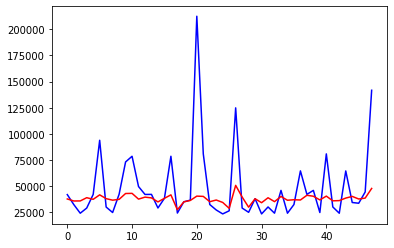

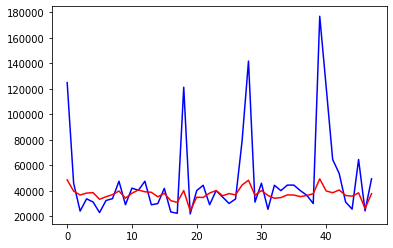

In [27]:
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
from sklearn.svm import SVR
best_svr = SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
# cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
cv = ShuffleSplit(n_splits=10, random_state = 0)
print(cv)
for train_index, test_index in cv.split(X):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    best_svr.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = best_svr.predict(X_test_fold)
    # scores.append(best_svr.score(X_test, y_test))
    
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMAE scores for 10 folds\n', mae_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))    
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))   

# SVR Analysis

## 0. Our best fit line is the line hyperplane that has maximum number of points. (SVR)
## 1. For linear kernel - Data should be linearly seperable - How to know this? - IF not working well, 
## 2. data must be linearly inseperable? 
## 3. C = 1000,-> Less Regularization was needed
## gamma = 0.1 -> Kernel Coefficient ,  rest default
## 4. SVM performs worse on highly skewed datasets (Can be seen by histograms)
## 5. Logistic regression works well on skewed datasets. (But this is a regression problem and logistic regression works great with classificaton problem)
## 6. How to prove whether given dataset is skewed and not linearly separable?
## 7. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. For very tiny values of C, you should get misclassified examples, often even if your training data is linearly separable.

# 2. Linear Regression + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] fit_intercept=True, normalize=True ..............................
[CV] .. fit_intercept=True, normalize=True, score=0.883, total=   0.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] fit_intercept=True, normalize=True ..............................
[CV] .. fit_intercept=True, normalize=True, score=0.904, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] fit_intercept=True, normalize=True ..............................
[CV] .. fit_intercept=True, normalize=True, score=0.826, total=   0.0s
[CV] fit_intercept=True, normalize=False .............................
[CV] . fit_intercept=True, normalize=False, score=0.883, total=   0.0s
[CV] fit_intercept=True, normalize=False .............................
[CV] . fit_intercept=True, normalize=False, score=0.904, total=   0.0s
[CV] fit_intercept=True, normalize=False .............................
[CV] . fit_intercept=True, normalize=False, score=0.826, total=   0.0s
[CV] fit_intercept=False, normalize=True .............................
[CV]  fit_intercept=False, normalize=True, score=-0.974, total=   0.0s
[CV] fit_intercept=False, normalize=True .............................
[CV]  fit_intercept=False, normalize=True, score=-0.946, total=   0.0s
[CV] fit_intercept=False, normalize=True .............................
[CV]  fit_intercept=False, normalize=True, score=-2.324, total=   0.0s
[CV] f

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.4s finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'fit_intercept': True, 'normalize': False}
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
MSE =  147518504.45347038
R2 score = 0.8517322797271887

Mean Absolute Percentage Error = 0.20680423216045868
Mean Absolute Error is: 8468.559624463953


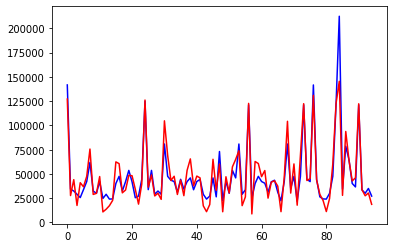

In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# defining parameter range 
param_grid = {'fit_intercept': [True, False],  
             'normalize' : [True, False], 
             } 
grid = GridSearchCV(reg, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
print('\nMean Absolute Percentage Error =',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))

# 10 fold cross validation for best LR

KFold(n_splits=10, random_state=42, shuffle=True)
(427, 22) (48, 22) (427,) (48,)
(427, 22) (48, 22) (427,) (48,)
(427, 22) (48, 22) (427,) (48,)
(427, 22) (48, 22) (427,) (48,)
(427, 22) (48, 22) (427,) (48,)
(428, 22) (47, 22) (428,) (47,)
(428, 22) (47, 22) (428,) (47,)
(428, 22) (47, 22) (428,) (47,)
(428, 22) (47, 22) (428,) (47,)
(428, 22) (47, 22) (428,) (47,)
MSE for 10 folds
 [95072809.04342937, 165189796.50579256, 68166218.17886834, 184313642.1486349, 179335564.69482684, 135876634.13797936, 180337252.48911557, 76874491.72858655, 87668516.88358329, 173030017.7764257]

R2 scores for 10 folds
 [0.8123341484661075, 0.8833666419290108, 0.9239536612745525, 0.8602039785187706, 0.8969485616280132, 0.9089315883533997, 0.8976931078253088, 0.7178100612680081, 0.8545420742982517, 0.8786228417311044]

MAPE for 10 folds
 [0.19899853250688684, 0.16776634478004782, 0.13673532598315755, 0.1579723531764313, 0.12786874517382776, 0.18591120204447456, 0.14590444702702415, 0.1910716385651196, 0.20

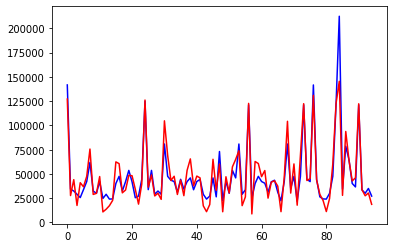

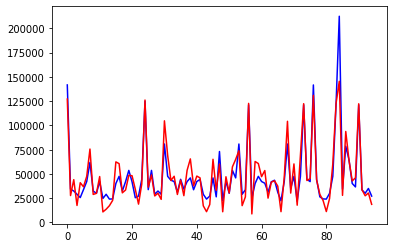

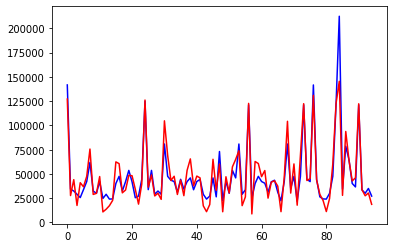

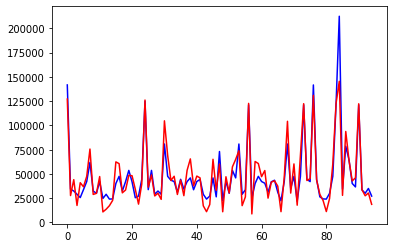

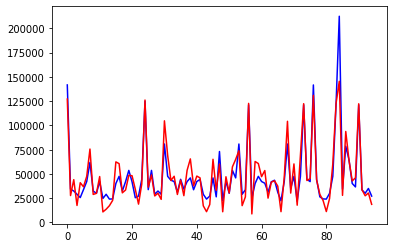

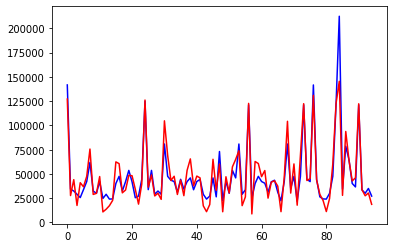

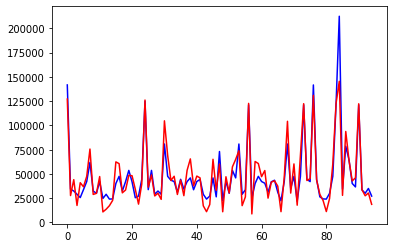

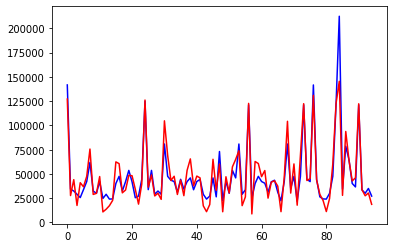

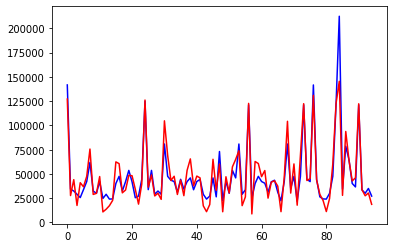

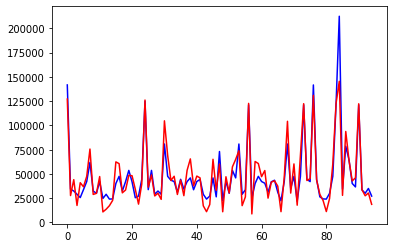

In [36]:
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
best_lr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
for train_index, test_index in cv.split(X):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    best_lr.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = best_lr.predict(X_test_fold)
    # scores.append(best_svr.score(X_test, y_test))
    
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')

    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMAE scores for 10 folds\n', mae_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))    
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))   

# 3. Ridge Regression + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 140 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=auto ......
[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=auto, score=0.852, total=   0.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=auto ......
[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=auto, score=0.892, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=auto ......
[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=auto, score=0.834, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=svd .......
[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=svd, score=0.852, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=svd .......
[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=svd, score=0.892, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=svd .......
[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=svd, score=0.834, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=cholesky ..
[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=cholesky, score=0.852, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=cholesky ..
[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=cholesky, score=0.892, total=   0.0s
[CV] alpha=

[CV] alpha=1, fit_intercept=True, normalize=True, solver=sag .........
[CV]  alpha=1, fit_intercept=True, normalize=True, solver=sag, score=0.801, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=True, solver=sag .........
[CV]  alpha=1, fit_intercept=True, normalize=True, solver=sag, score=0.775, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=True, solver=saga ........
[CV]  alpha=1, fit_intercept=True, normalize=True, solver=saga, score=0.762, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=True, solver=saga ........
[CV]  alpha=1, fit_intercept=True, normalize=True, solver=saga, score=0.801, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=True, solver=saga ........
[CV]  alpha=1, fit_intercept=True, normalize=True, solver=saga, score=0.775, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=False, solver=auto .......
[CV]  alpha=1, fit_intercept=True, normalize=False, solver=auto, score=0.881, total=   0.0s
[CV] alpha=1, fit_intercept=T

[CV] alpha=10, fit_intercept=True, normalize=False, solver=lsqr ......
[CV]  alpha=10, fit_intercept=True, normalize=False, solver=lsqr, score=0.904, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=False, solver=lsqr ......
[CV]  alpha=10, fit_intercept=True, normalize=False, solver=lsqr, score=0.833, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=False, solver=sparse_cg .
[CV]  alpha=10, fit_intercept=True, normalize=False, solver=sparse_cg, score=0.867, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=False, solver=sparse_cg .
[CV]  alpha=10, fit_intercept=True, normalize=False, solver=sparse_cg, score=0.904, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=False, solver=sparse_cg .
[CV]  alpha=10, fit_intercept=True, normalize=False, solver=sparse_cg, score=0.833, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=False, solver=sag .......
[CV]  alpha=10, fit_intercept=True, normalize=False, solver=sag, score=0.867, total=   0.0s
[C

[CV]  alpha=100, fit_intercept=False, normalize=True, solver=svd, score=-0.977, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=True, solver=svd ......
[CV]  alpha=100, fit_intercept=False, normalize=True, solver=svd, score=-0.908, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=True, solver=svd ......
[CV]  alpha=100, fit_intercept=False, normalize=True, solver=svd, score=-2.015, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=True, solver=cholesky .
[CV]  alpha=100, fit_intercept=False, normalize=True, solver=cholesky, score=-0.977, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=True, solver=cholesky .
[CV]  alpha=100, fit_intercept=False, normalize=True, solver=cholesky, score=-0.908, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=True, solver=cholesky .
[CV]  alpha=100, fit_intercept=False, normalize=True, solver=cholesky, score=-2.015, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=True, solver=lsqr .

[CV]  alpha=1000, fit_intercept=False, normalize=True, solver=sag, score=-1.188, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=True, solver=sag .....
[CV]  alpha=1000, fit_intercept=False, normalize=True, solver=sag, score=-1.837, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=True, solver=saga ....
[CV]  alpha=1000, fit_intercept=False, normalize=True, solver=saga, score=-1.251, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=True, solver=saga ....
[CV]  alpha=1000, fit_intercept=False, normalize=True, solver=saga, score=-1.188, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=True, solver=saga ....
[CV]  alpha=1000, fit_intercept=False, normalize=True, solver=saga, score=-1.837, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=False, solver=auto ...
[CV]  alpha=1000, fit_intercept=False, normalize=False, solver=auto, score=-1.251, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=False, solver=auto ...

[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    7.1s finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 1, 'fit_intercept': True, 'normalize': False, 'solver': 'auto'}
Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
MSE =  143393237.24409848
R2 score = 0.8558784983111947

Mean Absolute Percentage Error = 0.19829229258367798
Mean Absolute Error is: 8162.62796170473


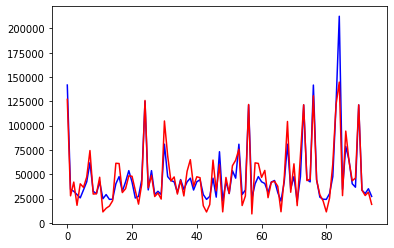

In [37]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=1.0, fit_intercept=True, 
                         normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)
# defining parameter range 
param_grid = {'alpha': [0.1, 1, 10, 100, 1000],  
             'fit_intercept' : [True, False],
              'normalize' :[True, False],
              'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
             } 
grid = GridSearchCV(reg, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
print('\nMean Absolute Percentage Error =',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))

# 10 fold cross validation for best RR

KFold(n_splits=10, random_state=42, shuffle=True)
(427, 22) (48, 22) (427,) (48,)
(427, 22) (48, 22) (427,) (48,)
(427, 22) (48, 22) (427,) (48,)
(427, 22) (48, 22) (427,) (48,)
(427, 22) (48, 22) (427,) (48,)
(428, 22) (47, 22) (428,) (47,)
(428, 22) (47, 22) (428,) (47,)
(428, 22) (47, 22) (428,) (47,)
(428, 22) (47, 22) (428,) (47,)
(428, 22) (47, 22) (428,) (47,)
MSE for 10 folds
 [92355191.87503289, 162624776.3821592, 68699499.20510457, 186561845.0443568, 182008258.37641156, 136197940.03446314, 180612415.42370135, 74555057.3035501, 86006601.58054237, 173650567.77080637]

R2 scores for 10 folds
 [0.8176984996952511, 0.8851776915026963, 0.92335873213457, 0.8584987882971427, 0.8954127540000967, 0.908716239939516, 0.8975370054987479, 0.7263242126279256, 0.8572994923687928, 0.8781875381008463]

MAPE for 10 folds
 [0.1937124631255918, 0.1615482125092307, 0.13573026600246754, 0.15575463245220014, 0.12689129279069608, 0.1833511667644184, 0.1420775135032157, 0.1893286736914746, 0.205094846

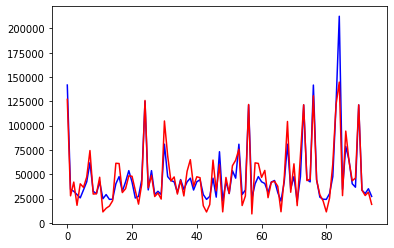

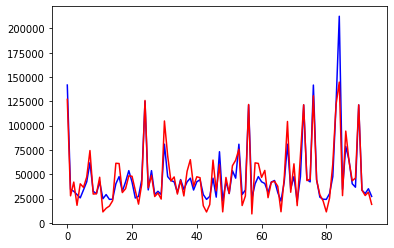

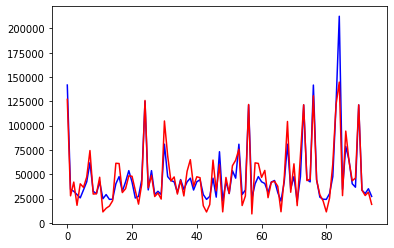

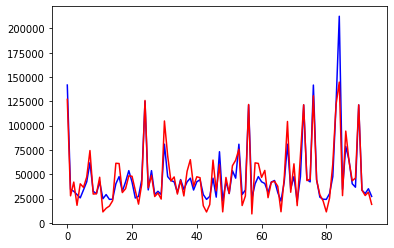

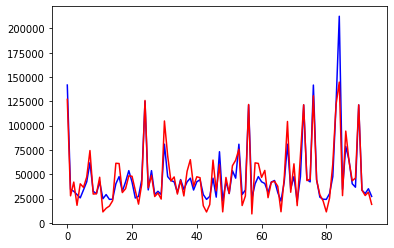

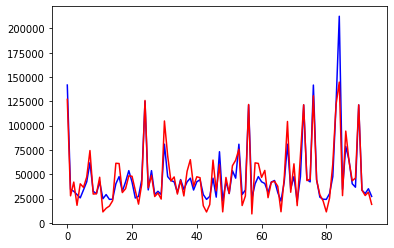

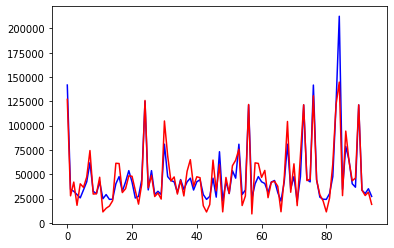

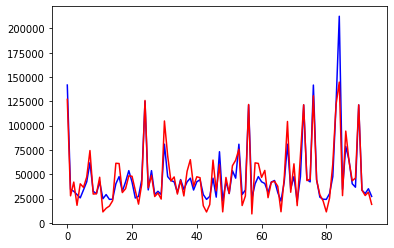

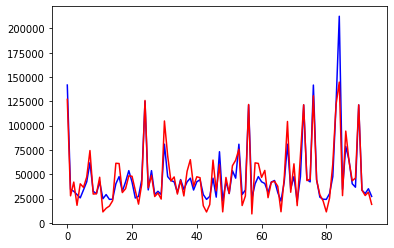

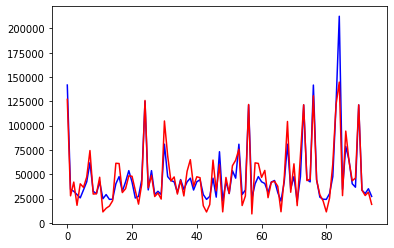

In [38]:
from sklearn import linear_model
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
best_rr = linear_model.Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
for train_index, test_index in cv.split(X):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    best_rr.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = best_rr.predict(X_test_fold)
    # scores.append(best_svr.score(X_test, y_test))
    
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')

    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMAE scores for 10 folds\n', mae_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))    
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))   

# 4. K-Nearest Neighbors + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_neighbors=2, p=1, weights=uniform .............................
[CV] . n_neighbors=2, p=1, weights=uniform, score=0.975, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] n_neighbors=2, p=1, weights=uniform .............................
[CV] . n_neighbors=2, p=1, weights=uniform, score=0.968, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] n_neighbors=2, p=1, weights=uniform .............................
[CV] . n_neighbors=2, p=1, weights=uniform, score=0.957, total=   0.0s
[CV] n_neighbors=2, p=1, weights=distance ............................
[CV]  n_neighbors=2, p=1, weights=distance, score=0.974, total=   0.0s
[CV] n_neighbors=2, p=1, weights=distance ............................
[CV]  n_neighbors=2, p=1, weights=distance, score=0.974, total=   0.0s
[CV] n_neighbors=2, p=1, weights=distance ............................
[CV]  n_neighbors=2, p=1, weights=distance, score=0.963, total=   0.0s
[CV] n_neighbors=2, p=2, weights=uniform .............................
[CV] . n_neighbors=2, p=2, weights=uniform, score=0.972, total=   0.0s
[CV] n_neighbors=2, p=2, weights=uniform .............................
[CV] . n_neighbors=2, p=2, weights=uniform, score=0.971, total=   0.0s
[CV] n_neighbors=2, p=2, weights=uniform .............................
[CV] . n_neighbors=2, p=2, weights=uniform, score=0.955, total=   0.0s
[CV] n

[CV] n_neighbors=5, p=2, weights=distance ............................
[CV]  n_neighbors=5, p=2, weights=distance, score=0.931, total=   0.0s
[CV] n_neighbors=5, p=2, weights=distance ............................
[CV]  n_neighbors=5, p=2, weights=distance, score=0.964, total=   0.0s
[CV] n_neighbors=5, p=2, weights=distance ............................
[CV]  n_neighbors=5, p=2, weights=distance, score=0.943, total=   0.0s
[CV] n_neighbors=5, p=4, weights=uniform .............................
[CV] . n_neighbors=5, p=4, weights=uniform, score=0.895, total=   0.0s
[CV] n_neighbors=5, p=4, weights=uniform .............................
[CV] . n_neighbors=5, p=4, weights=uniform, score=0.948, total=   0.0s
[CV] n_neighbors=5, p=4, weights=uniform .............................
[CV] . n_neighbors=5, p=4, weights=uniform, score=0.930, total=   0.0s
[CV] n_neighbors=5, p=4, weights=distance ............................
[CV]  n_neighbors=5, p=4, weights=distance, score=0.909, total=   0.0s
[CV] n

[CV] n_neighbors=9, p=4, weights=distance ............................
[CV]  n_neighbors=9, p=4, weights=distance, score=0.929, total=   0.0s
[CV] n_neighbors=9, p=4, weights=distance ............................
[CV]  n_neighbors=9, p=4, weights=distance, score=0.912, total=   0.0s
[CV] n_neighbors=9, p=5, weights=uniform .............................
[CV] . n_neighbors=9, p=5, weights=uniform, score=0.845, total=   0.0s
[CV] n_neighbors=9, p=5, weights=uniform .............................
[CV] . n_neighbors=9, p=5, weights=uniform, score=0.896, total=   0.0s
[CV] n_neighbors=9, p=5, weights=uniform .............................
[CV] . n_neighbors=9, p=5, weights=uniform, score=0.866, total=   0.0s
[CV] n_neighbors=9, p=5, weights=distance ............................
[CV]  n_neighbors=9, p=5, weights=distance, score=0.876, total=   0.0s
[CV] n_neighbors=9, p=5, weights=distance ............................
[CV]  n_neighbors=9, p=5, weights=distance, score=0.930, total=   0.0s
[CV] n

[CV]  n_neighbors=15, p=5, weights=distance, score=0.883, total=   0.0s
[CV] n_neighbors=15, p=5, weights=distance ...........................
[CV]  n_neighbors=15, p=5, weights=distance, score=0.875, total=   0.0s
[CV] n_neighbors=15, p=7, weights=uniform ............................
[CV]  n_neighbors=15, p=7, weights=uniform, score=0.762, total=   0.0s
[CV] n_neighbors=15, p=7, weights=uniform ............................
[CV]  n_neighbors=15, p=7, weights=uniform, score=0.815, total=   0.0s
[CV] n_neighbors=15, p=7, weights=uniform ............................
[CV]  n_neighbors=15, p=7, weights=uniform, score=0.807, total=   0.0s
[CV] n_neighbors=15, p=7, weights=distance ...........................
[CV]  n_neighbors=15, p=7, weights=distance, score=0.828, total=   0.0s
[CV] n_neighbors=15, p=7, weights=distance ...........................
[CV]  n_neighbors=15, p=7, weights=distance, score=0.877, total=   0.0s
[CV] n_neighbors=15, p=7, weights=distance ...........................
[C

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   10.0s finished


{'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=1,
                    weights='distance')
MSE =  16271687.551858362
R2 score = 0.9836456719294732

Mean Absolute Percentage Error = 0.05359029265119805
Mean Absolute Error is: 2418.1386156022795


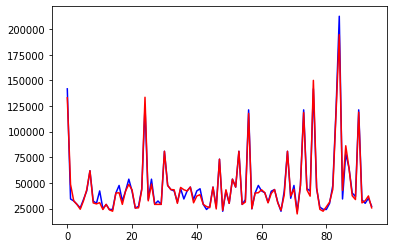

In [39]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5, weights='uniform', 
                            algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
# defining parameter range 
param_grid = {'n_neighbors': [2, 3, 4, 5, 6, 7, 9, 10, 13, 15],  
             'weights' : ['uniform', 'distance'],
              'p' : [1, 2, 4, 5, 7 ,10]
             } 
grid = GridSearchCV(neigh, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
print('\nMean Absolute Percentage Error =',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))

# 10 fold cross validation for best KNN Regressor

KFold(n_splits=10, random_state=42, shuffle=True)
(427, 22) (48, 22) (427,) (48,)
(427, 22) (48, 22) (427,) (48,)
(427, 22) (48, 22) (427,) (48,)
(427, 22) (48, 22) (427,) (48,)
(427, 22) (48, 22) (427,) (48,)
(428, 22) (47, 22) (428,) (47,)
(428, 22) (47, 22) (428,) (47,)
(428, 22) (47, 22) (428,) (47,)
(428, 22) (47, 22) (428,) (47,)
(428, 22) (47, 22) (428,) (47,)
MSE for 10 folds
 [49055228.931162946, 31699010.23811898, 58170538.0553719, 83166892.92204092, 80557430.23849256, 75201523.42871353, 95089526.24632032, 50192842.94268456, 18713348.779199827, 90478750.42087604]

R2 scores for 10 folds
 [0.9031690406312552, 0.9776187023060541, 0.9351048575235219, 0.9369205631557054, 0.9537093544620984, 0.949597785259362, 0.9460548845324571, 0.815752729464699, 0.9689511697800208, 0.9365309340487]

MAPE for 10 folds
 [0.10127583185637905, 0.09715566260970558, 0.11726582241109657, 0.09257089642849083, 0.11722204953785743, 0.09949476081785244, 0.10798575990664522, 0.13217172348054, 0.09186796320

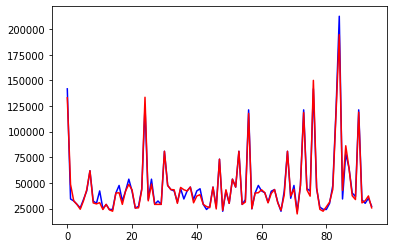

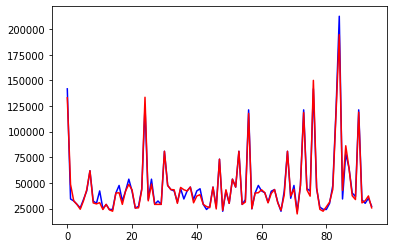

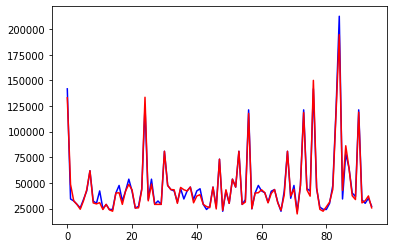

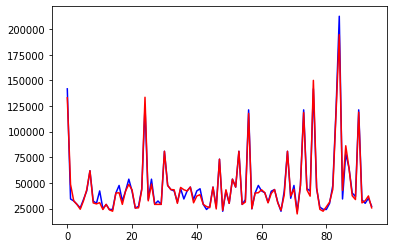

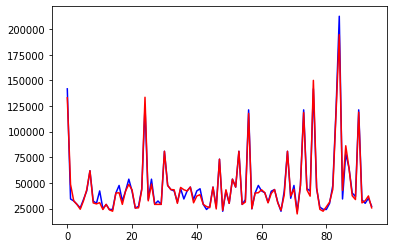

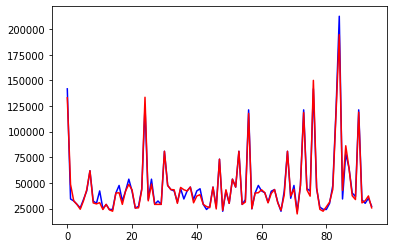

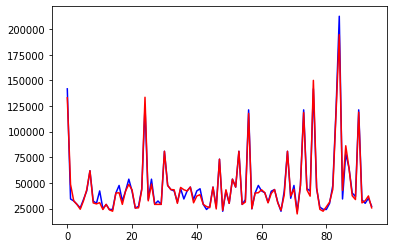

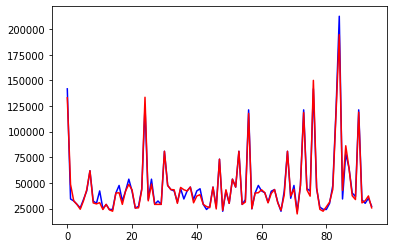

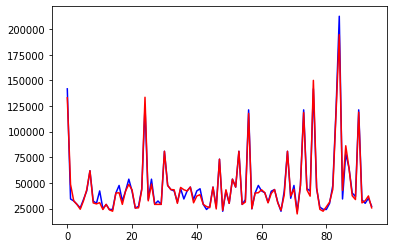

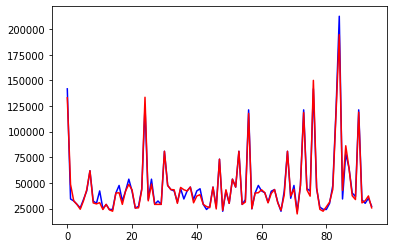

In [40]:
from sklearn.neighbors import KNeighborsRegressor
best_neigh = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=1,
                    weights='distance')
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
for train_index, test_index in cv.split(X):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    best_neigh.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = best_neigh.predict(X_test_fold)
    # scores.append(best_svr.score(X_test, y_test))
    
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')

    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMAE scores for 10 folds\n', mae_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))    
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))   

# 5. Gaussian Process Regressor (Marcov Chain Monte Carlo) + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] alpha=1e-10, normalize_y=True ...................................
[CV] ....... alpha=1e-10, normalize_y=True, score=0.960, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] alpha=1e-10, normalize_y=True ...................................
[CV] ....... alpha=1e-10, normalize_y=True, score=0.998, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] alpha=1e-10, normalize_y=True ...................................
[CV] ....... alpha=1e-10, normalize_y=True, score=0.989, total=   0.0s
[CV] alpha=1e-10, normalize_y=False ..................................
[CV] ...... alpha=1e-10, normalize_y=False, score=0.889, total=   0.0s
[CV] alpha=1e-10, normalize_y=False ..................................
[CV] ...... alpha=1e-10, normalize_y=False, score=0.971, total=   0.0s
[CV] alpha=1e-10, normalize_y=False ..................................
[CV] ...... alpha=1e-10, normalize_y=False, score=0.857, total=   0.0s
[CV] alpha=1e-09, normalize_y=True ...................................
[CV] ....... alpha=1e-09, normalize_y=True, score=0.960, total=   0.0s
[CV] alpha=1e-09, normalize_y=True ...................................
[CV] ....... alpha=1e-09, normalize_y=True, score=0.998, total=   0.0s
[CV] alpha=1e-09, normalize_y=True ...................................
[CV] ....... alpha=1e-09, normalize_y=True, score=0.989, total=   0.0s
[CV] a

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.4s finished


{'alpha': 1e-10, 'normalize_y': True}
GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
                         n_restarts_optimizer=0, normalize_y=True,
                         optimizer='fmin_l_bfgs_b', random_state=None)
MSE =  249004500.55162016
R2 score = 0.7497308573508238

Mean Absolute Percentage Error = 0.12412856940854876
Mean Absolute Error is: 7205.7462119989905


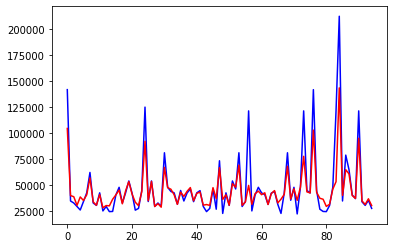

In [41]:
from sklearn.gaussian_process import GaussianProcessRegressor
gpr = GaussianProcessRegressor(kernel=None, alpha=1e-10, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=0 , 
                               normalize_y= True, copy_X_train=True, random_state= None)
# defining parameter range 
param_grid = {'alpha': [1e-10, 1e-9, 1e-5, 1e-2],  
             'normalize_y' : [True, False],
                         } 
grid = GridSearchCV(gpr, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
print('\nMean Absolute Percentage Error =',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))

# 10 fold cross validation for best Gaussian Process Regressor

KFold(n_splits=10, random_state=42, shuffle=True)
(427, 22) (48, 22) (427,) (48,)
(427, 22) (48, 22) (427,) (48,)
(427, 22) (48, 22) (427,) (48,)
(427, 22) (48, 22) (427,) (48,)
(427, 22) (48, 22) (427,) (48,)
(428, 22) (47, 22) (428,) (47,)
(428, 22) (47, 22) (428,) (47,)
(428, 22) (47, 22) (428,) (47,)
(428, 22) (47, 22) (428,) (47,)
(428, 22) (47, 22) (428,) (47,)
MSE for 10 folds
 [36695574.43688378, 473114443.35813636, 74362252.41755138, 75783959.86897977, 37608518.59554569, 47636873.73614225, 183456591.43761688, 46034747.520964175, 70193688.40275225, 174412026.97798222]

R2 scores for 10 folds
 [0.927565975029965, 0.665954390355997, 0.9170413558678924, 0.942520282501753, 0.9783890499193192, 0.968072402922825, 0.8959234797032439, 0.831016214996932, 0.8835359753379018, 0.8776533894259955]

MAPE for 10 folds
 [0.13593742379533535, 0.1391733725315765, 0.1345204678643566, 0.10128070358151668, 0.0916634948530806, 0.11577452887525652, 0.09764311391789063, 0.12482328212664363, 0.14815181

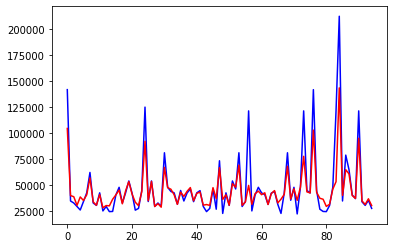

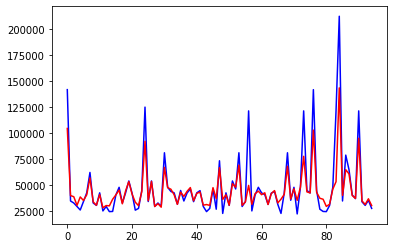

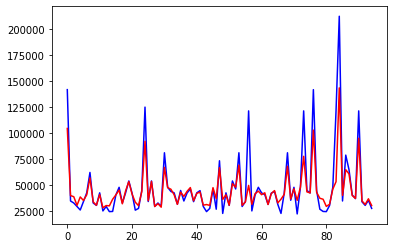

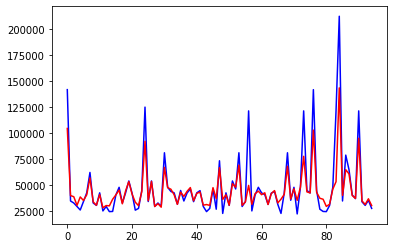

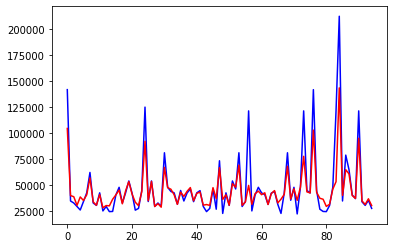

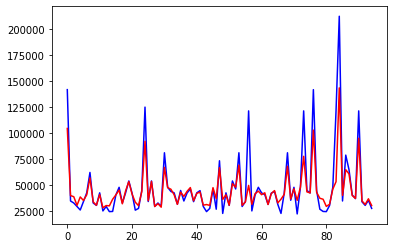

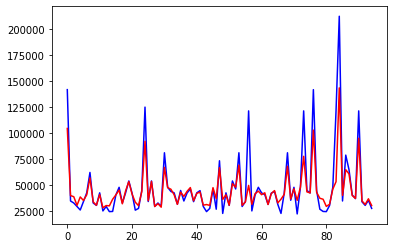

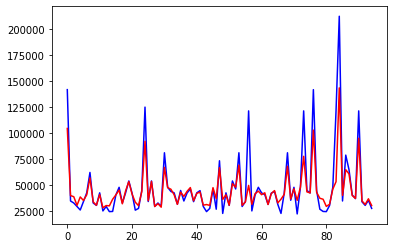

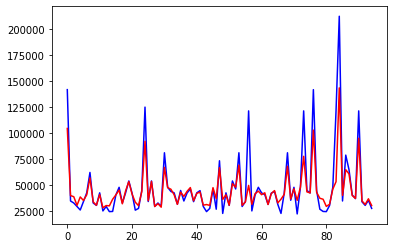

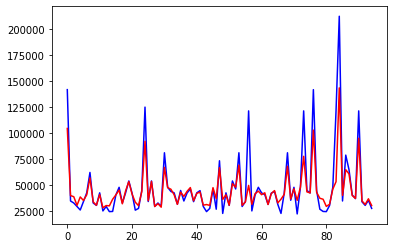

In [42]:
from sklearn.gaussian_process import GaussianProcessRegressor
gpr_best = GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
                         n_restarts_optimizer=0, normalize_y=True,
                         optimizer='fmin_l_bfgs_b', random_state=None)
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state = 42, shuffle= True)
print(cv)
for train_index, test_index in cv.split(X):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    gpr_best.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = gpr_best.predict(X_test_fold)
    # scores.append(best_svr.score(X_test, y_test))
    
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')

    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMAE scores for 10 folds\n', mae_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))    
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))   

# 6. Decision Tree + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 1260 candidates, totalling 3780 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=best, score=0.905, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=best, score=0.907, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=best, score=0.897, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=random 
[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=random, score=0.788, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=random 
[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=random, score=0.819, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=random 
[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=random, score=0.714, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=2, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=2, splitter=best, score

[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=7, splitter=random 
[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.805, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=7, splitter=random 
[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.203, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=best, score=0.851, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=best, score=0.853, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=best, score=0.6

[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=best 
[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=best, score=0.922, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=best 
[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=best, score=0.944, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=best 
[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=best, score=0.960, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=random 
[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=random, score=0.859, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=random 
[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=random, score=0.8

[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=best 
[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=best, score=0.685, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=random 
[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=random, score=0.704, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=random 
[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=random, score=0.775, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=random 
[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=random, score=0.775, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=best 
[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=best, score

[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=random 
[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.917, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=random 
[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.908, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=best 
[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.910, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=best 
[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.824, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=best 
[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.9

[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=best 
[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=best, score=0.982, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=best 
[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=best, score=0.988, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=best 
[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=best, score=0.988, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=random 
[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=random, score=0.902, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=random 
[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=random, score=0.9

[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=best 
[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=best, score=0.743, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=random 
[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=random, score=0.722, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=random 
[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=random, score=0.750, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=random 
[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=random, score=0.669, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=best 
[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=best, score

[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=random 
[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.869, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=random 
[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.826, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=best 
[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.888, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=best 
[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.914, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=best 
[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.8

[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=best 
[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=best, score=0.991, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=best 
[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=best, score=0.998, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=best 
[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=best, score=0.996, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random 
[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random, score=0.943, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random 
[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random, score=0.9

[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=best 
[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=best, score=0.962, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=random 
[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=random, score=0.949, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=random 
[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=random, score=0.971, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=random 
[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=random, score=0.849, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=best 
[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=best, score

[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.930, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=random 
[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.971, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=random 
[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.948, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=best 
[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.955, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=best 
[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.974, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_s

[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=random, score=0.892, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=random 
[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=random, score=0.747, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=best 
[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=best, score=1.000, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=best 
[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=best, score=1.000, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=best 
[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=best, score=0.997, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_sampl

[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.462, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=best 
[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.919, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=best 
[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.766, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=best 
[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.767, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=random 
[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.585, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_sampl

[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=best, score=0.963, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=best 
[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=best, score=0.988, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=best 
[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=best, score=0.982, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=random 
[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=random, score=0.870, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=random 
[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=random, score=0.945, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_sam

[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, splitter=best, score=0.960, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, splitter=best 
[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, splitter=best, score=0.912, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, splitter=random 
[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, splitter=random, score=0.879, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, splitter=random 
[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, splitter=random, score=0.899, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, splitter=random 
[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, splitter=random, score=0.644, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min

[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.902, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=4, splitter=random 
[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.888, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=4, splitter=random 
[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.798, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=4, splitter=random 
[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.851, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=5, splitter=best 
[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.978, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min

[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=best, score=0.897, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=random 
[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=random, score=0.817, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=random 
[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=random, score=0.874, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=random 
[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=random, score=0.696, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=4, splitter=best 
[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=4, splitter=best, score=0.905

[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=random, score=0.588, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=random 
[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=random, score=0.744, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=random 
[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=random, score=0.657, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=2, splitter=best 
[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=2, splitter=best, score=0.886, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=2, splitter=best 
[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=2, splitter=best, score=0.598, 

[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=best, score=0.746, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=best 
[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=best, score=0.903, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=best 
[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=best, score=0.657, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=random 
[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=random, score=0.740, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=random 
[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=random, score=0.781, to

[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=best, score=0.952, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=best 
[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=best, score=0.980, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=random 
[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=random, score=0.904, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=random 
[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=random, score=0.903, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=random 
[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=random, score=0.924

[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=best, score=0.647, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=random 
[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=random, score=0.675, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=random 
[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=random, score=0.899, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=random 
[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=random, score=0.572, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=6, splitter=best 
[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=6, splitter=best, score=0.723

[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.881, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=random 
[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.942, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=random 
[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.351, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=best 
[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.881, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=best 
[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.773, 

[CV]  criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=random, score=0.999, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=random 
[CV]  criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=random, score=0.995, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=2, splitter=best 
[CV]  criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=2, splitter=best, score=0.995, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=2, splitter=best 
[CV]  criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=2, splitter=best, score=1.000, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=2, splitter=best 
[CV]  criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=2, splitter=best, score=0.997, tota

[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.537, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=best 
[CV]  criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best, score=0.896, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=random 
[CV]  criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=random, score=0.917, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=random 
[CV]  criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=random, score=0.986, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=random 
[CV]  criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=random, score=0.9

[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=best, score=0.982, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=random 
[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=random, score=0.938, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=random 
[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=random, score=0.919, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=random 
[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=random, score=0.770, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=best 
[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=best, sc

[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=random, score=0.905, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=random 
[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=random, score=0.902, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=random 
[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=random, score=0.642, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=5, splitter=best 
[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=5, splitter=best, score=0.892, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=5, splitter=best 
[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=5, splitter=best, scor

[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.990, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=random 
[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.813, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=best 
[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.940, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=best 
[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.902, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=best 
[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.

[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=6, splitter=best 
[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.688, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=6, splitter=random 
[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.801, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=6, splitter=random 
[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.896, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=6, splitter=random 
[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.807, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=7, splitter=best 
[CV

[CV] criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=4, splitter=random 
[CV]  criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=4, splitter=random, score=0.981, total=   0.0s
[CV] criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=4, splitter=random 
[CV]  criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=4, splitter=random, score=0.957, total=   0.0s
[CV] criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=4, splitter=random 
[CV]  criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=4, splitter=random, score=0.741, total=   0.0s
[CV] criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=5, splitter=best 
[CV]  criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=5, splitter=best, score=0.983, total=   0.0s
[CV] criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=5, splitter=best 
[CV

[CV] criterion=friedman_mse, max_depth=30, max_features=log2, min_samples_leaf=2, splitter=random 
[CV]  criterion=friedman_mse, max_depth=30, max_features=log2, min_samples_leaf=2, splitter=random, score=0.910, total=   0.0s
[CV] criterion=friedman_mse, max_depth=30, max_features=log2, min_samples_leaf=2, splitter=random 
[CV]  criterion=friedman_mse, max_depth=30, max_features=log2, min_samples_leaf=2, splitter=random, score=0.655, total=   0.0s
[CV] criterion=friedman_mse, max_depth=30, max_features=log2, min_samples_leaf=3, splitter=best 
[CV]  criterion=friedman_mse, max_depth=30, max_features=log2, min_samples_leaf=3, splitter=best, score=0.936, total=   0.0s
[CV] criterion=friedman_mse, max_depth=30, max_features=log2, min_samples_leaf=3, splitter=best 
[CV]  criterion=friedman_mse, max_depth=30, max_features=log2, min_samples_leaf=3, splitter=best, score=0.889, total=   0.0s
[CV] criterion=friedman_mse, max_depth=30, max_features=log2, min_samples_leaf=3, splitter=best 
[CV]  c

[CV] criterion=mae, max_depth=2, max_features=sqrt, min_samples_leaf=1, splitter=random 
[CV]  criterion=mae, max_depth=2, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.770, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=sqrt, min_samples_leaf=1, splitter=random 
[CV]  criterion=mae, max_depth=2, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.843, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=sqrt, min_samples_leaf=1, splitter=random 
[CV]  criterion=mae, max_depth=2, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.519, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=sqrt, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=2, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.708, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=sqrt, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=2, max_features=sqrt, min_samples_leaf=2, splitter=best, score

[CV] criterion=mae, max_depth=2, max_features=log2, min_samples_leaf=7, splitter=random 
[CV]  criterion=mae, max_depth=2, max_features=log2, min_samples_leaf=7, splitter=random, score=0.341, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=1, splitter=best 
[CV]  criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=1, splitter=best, score=0.979, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=1, splitter=best 
[CV]  criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=1, splitter=best, score=0.925, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=1, splitter=best 
[CV]  criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=1, splitter=best, score=0.955, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=1, splitter=random 
[CV]  criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=1, splitter=random, score=0.8

[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=best 
[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.885, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=best 
[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.853, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=random 
[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.688, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=random 
[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.796, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=random 
[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=random, score

[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.888, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.820, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.842, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.794, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=random, score

[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=random 
[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=random, score=0.960, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=random 
[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=random, score=0.932, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=random 
[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=random, score=0.984, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=2, splitter=best, score=0.995, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=2, splitter=best, score

[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=random 
[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.607, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=best 
[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=best, score=0.791, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=best 
[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=best, score=0.968, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=best 
[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=best, score=0.969, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=random 
[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=random, score=0.8

[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=best 
[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=best, score=0.924, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=best 
[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=best, score=0.962, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=random 
[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=random, score=0.929, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=random 
[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=random, score=0.903, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=random 
[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=random, score

[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=random 
[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=random, score=0.700, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=random 
[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=random, score=0.843, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=random 
[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=random, score=0.656, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=7, splitter=best 
[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=7, splitter=best, score=0.837, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=7, splitter=best 
[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=7, splitter=best, score

[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=random 
[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.671, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=best 
[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.744, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=best 
[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.896, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=best 
[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.923, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=random 
[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.9

[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=best, score=0.976, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=best 
[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=best, score=0.928, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=best 
[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=best, score=0.975, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=random, score=0.938, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=random, score=0.919, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=auto, min_sam

[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=best, score=0.922, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=best 
[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=best, score=0.497, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=random, score=0.911, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=random, score=0.904, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=random, score=0.734, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min

[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.894, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=random 
[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.860, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=random 
[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.824, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=random 
[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.676, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=best 
[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.864, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min

[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=random, score=0.964, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=random 
[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=random, score=1.000, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=random 
[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=random, score=0.995, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=best, score=0.983, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=best, score=0.899, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=auto, min_s

[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=1, splitter=random, score=0.940, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=1, splitter=random 
[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=1, splitter=random, score=0.876, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=2, splitter=best, score=0.900, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=2, splitter=best, score=0.955, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=2, splitter=best, score=0.971, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_sampl

[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=7, splitter=random, score=0.930, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=1, splitter=best 
[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.989, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=1, splitter=best 
[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.935, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=1, splitter=best 
[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.953, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=1, splitter=random 
[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.937, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_sampl

[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=7, splitter=best, score=0.922, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=7, splitter=best 
[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=7, splitter=best, score=0.698, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=7, splitter=best 
[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=7, splitter=best, score=0.871, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=7, splitter=random 
[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=7, splitter=random, score=0.860, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=7, splitter=random 
[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=7, splitter=random, score=0.879, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=log2, min_sam

[Parallel(n_jobs=1)]: Done 3780 out of 3780 | elapsed:   44.6s finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'mae', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'splitter': 'best'}
DecisionTreeRegressor(criterion='mae', max_depth=20, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
MSE =  4148846.705263158
R2 score = 0.9958300821647446

Mean Absolute Percentage Error = 0.040664728456313144
Mean Absolute Error is: 1463.1894736842105


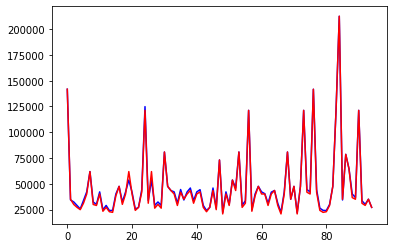

In [43]:
from sklearn.tree import DecisionTreeRegressor #  ' min_samples_split' : [2],
regressor = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, 
                                  min_samples_split=2,
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                  max_features=None, random_state=None, max_leaf_nodes=None, 
                                  min_impurity_decrease=0.0, min_impurity_split=None)
# defining parameter range 
param_grid = {'criterion': ['mse','friedman_mse', 'mae'],  
              'splitter' : ['best', 'random'], 
              'max_depth': [2,3,4,5,7,9,10,15,20,30 ],
              'min_samples_leaf' : [1, 2,3,  4, 5,6, 7],
              'max_features' : ['auto', 'sqrt', 'log2'],
             } 
grid = GridSearchCV(regressor, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
print('\nMean Absolute Percentage Error =',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))

# 10 fold cross validation for best Decision Tree Regressor 

KFold(n_splits=10, random_state=42, shuffle=True)
(427, 22) (48, 22) (427,) (48,)
(427, 22) (48, 22) (427,) (48,)
(427, 22) (48, 22) (427,) (48,)
(427, 22) (48, 22) (427,) (48,)
(427, 22) (48, 22) (427,) (48,)
(428, 22) (47, 22) (428,) (47,)
(428, 22) (47, 22) (428,) (47,)
(428, 22) (47, 22) (428,) (47,)
(428, 22) (47, 22) (428,) (47,)
(428, 22) (47, 22) (428,) (47,)
MSE for 10 folds
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

R2 scores for 10 folds
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

MAPE for 10 folds
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

MAE scores for 10 folds
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Mean MSE =  0.0 
Median MSE =  0.0

Mean R2 score = 1.0 
Median R2 scores =  1.0

Mean Absolute Percentage Error = 0.0 
Median Absolute Percentage Error = 0.0

Mean MAE = 0.0 
Median MAE = 0.0


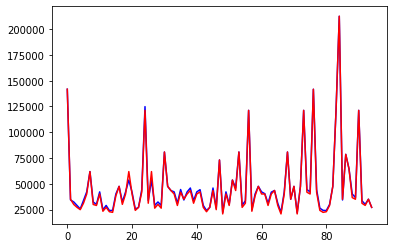

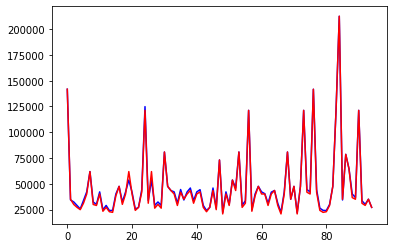

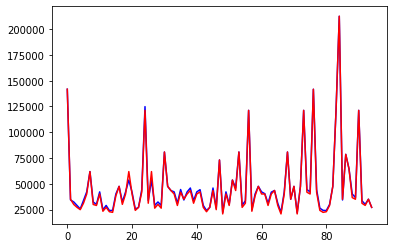

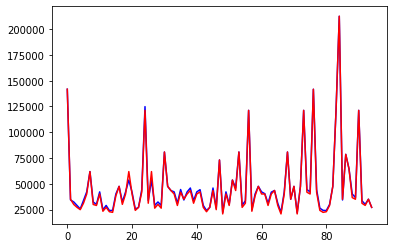

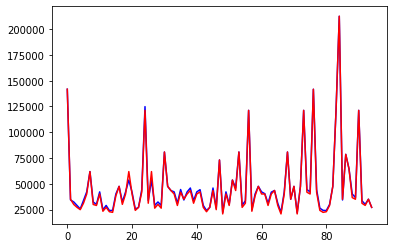

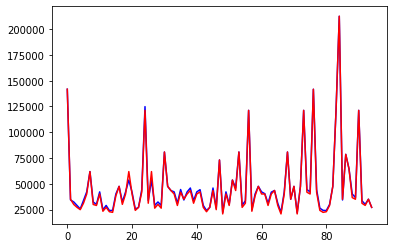

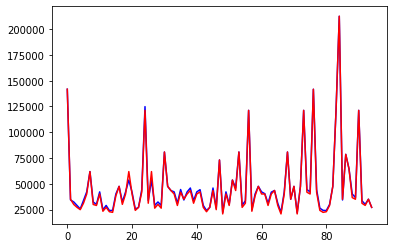

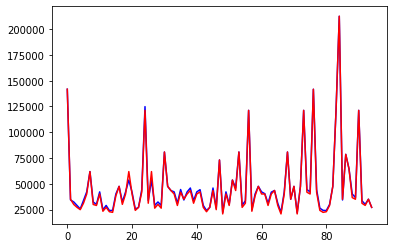

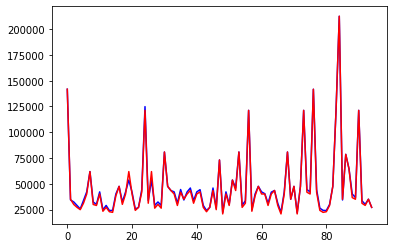

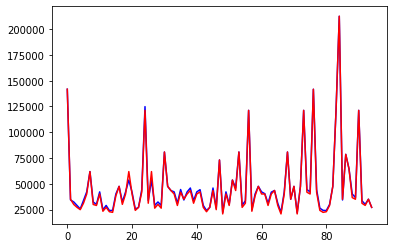

In [44]:
from sklearn.tree import DecisionTreeRegressor
regressor_best = DecisionTreeRegressor(criterion='mae', max_depth=20, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
for train_index, test_index in cv.split(X):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    regressor_best.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = regressor_best.predict(X_test_fold)
    # scores.append(best_svr.score(X_test, y_test))
    
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')

    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMAE scores for 10 folds\n', mae_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))    
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))   

# 7. Random Forest + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 168 candidates, totalling 504 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] criterion=mse, max_depth=3, n_estimators=10, warm_start=True ....
[CV]  criterion=mse, max_depth=3, n_estimators=10, warm_start=True, score=0.970, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=mse, max_depth=3, n_estimators=10, warm_start=True ....
[CV]  criterion=mse, max_depth=3, n_estimators=10, warm_start=True, score=0.987, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=mse, max_depth=3, n_estimators=10, warm_start=True ....
[CV]  criterion=mse, max_depth=3, n_estimators=10, warm_start=True, score=0.975, total=   0.0s
[CV] criterion=mse, max_depth=3, n_estimators=10, warm_start=False ...
[CV]  criterion=mse, max_depth=3, n_estimators=10, warm_start=False, score=0.977, total=   0.0s
[CV] criterion=mse, max_depth=3, n_estimators=10, warm_start=False ...
[CV]  criterion=mse, max_depth=3, n_estimators=10, warm_start=False, score=0.990, total=   0.0s
[CV] criterion=mse, max_depth=3, n_estimators=10, warm_start=False ...
[CV]  criterion=mse, max_depth=3, n_estimators=10, warm_start=False, score=0.980, total=   0.0s
[CV] criterion=mse, max_depth=3, n_estimators=50, warm_start=True ....
[CV]  criterion=mse, max_depth=3, n_estimators=50, warm_start=True, score=0.978, total=   0.1s
[CV] criterion=mse, max_depth=3, n_estimators=50, warm_start=True ....
[CV]  criterion=mse, max_depth=3, n_estimators=50, warm_start=True, score=0.990, total=   0.1s
[

[CV] criterion=mse, max_depth=10, n_estimators=10, warm_start=False ..
[CV]  criterion=mse, max_depth=10, n_estimators=10, warm_start=False, score=0.999, total=   0.0s
[CV] criterion=mse, max_depth=10, n_estimators=10, warm_start=False ..
[CV]  criterion=mse, max_depth=10, n_estimators=10, warm_start=False, score=0.991, total=   0.0s
[CV] criterion=mse, max_depth=10, n_estimators=50, warm_start=True ...
[CV]  criterion=mse, max_depth=10, n_estimators=50, warm_start=True, score=0.994, total=   0.1s
[CV] criterion=mse, max_depth=10, n_estimators=50, warm_start=True ...
[CV]  criterion=mse, max_depth=10, n_estimators=50, warm_start=True, score=0.999, total=   0.1s
[CV] criterion=mse, max_depth=10, n_estimators=50, warm_start=True ...
[CV]  criterion=mse, max_depth=10, n_estimators=50, warm_start=True, score=0.996, total=   0.1s
[CV] criterion=mse, max_depth=10, n_estimators=50, warm_start=False ..
[CV]  criterion=mse, max_depth=10, n_estimators=50, warm_start=False, score=0.990, total=   

[CV]  criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=True, score=0.994, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=False 
[CV]  criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=False, score=0.991, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=False 
[CV]  criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=False, score=0.998, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=False 
[CV]  criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=False, score=0.996, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=50, warm_start=True 
[CV]  criterion=friedman_mse, max_depth=4, n_estimators=50, warm_start=True, score=0.992, total=   0.1s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=50, warm_start=True 
[CV]  criterion=friedman_mse, max_depth=4, n_estimators=50, warm_start=True, score=0.998, tota

[CV]  criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=True, score=1.000, total=   0.3s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=True 
[CV]  criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=True, score=0.993, total=   0.3s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=False 
[CV]  criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=False, score=0.993, total=   0.3s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=False 
[CV]  criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=False, score=1.000, total=   0.4s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=False 
[CV]  criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=False, score=0.997, total=   0.4s
[CV] criterion=friedman_mse, max_depth=15, n_estimators=10, warm_start=True 
[CV]  criterion=friedman_mse, max_depth=15, n_estimators=10, warm_start=Tru

[CV] criterion=mae, max_depth=4, n_estimators=100, warm_start=False ..
[CV]  criterion=mae, max_depth=4, n_estimators=100, warm_start=False, score=0.976, total=   0.6s
[CV] criterion=mae, max_depth=4, n_estimators=100, warm_start=False ..
[CV]  criterion=mae, max_depth=4, n_estimators=100, warm_start=False, score=0.994, total=   0.6s
[CV] criterion=mae, max_depth=4, n_estimators=100, warm_start=False ..
[CV]  criterion=mae, max_depth=4, n_estimators=100, warm_start=False, score=0.994, total=   0.6s
[CV] criterion=mae, max_depth=4, n_estimators=200, warm_start=True ...
[CV]  criterion=mae, max_depth=4, n_estimators=200, warm_start=True, score=0.968, total=   1.2s
[CV] criterion=mae, max_depth=4, n_estimators=200, warm_start=True ...
[CV]  criterion=mae, max_depth=4, n_estimators=200, warm_start=True, score=0.995, total=   1.3s
[CV] criterion=mae, max_depth=4, n_estimators=200, warm_start=True ...
[CV]  criterion=mae, max_depth=4, n_estimators=200, warm_start=True, score=0.994, total=   

[CV]  criterion=mae, max_depth=15, n_estimators=100, warm_start=False, score=0.999, total=   0.9s
[CV] criterion=mae, max_depth=15, n_estimators=100, warm_start=False .
[CV]  criterion=mae, max_depth=15, n_estimators=100, warm_start=False, score=0.997, total=   0.8s
[CV] criterion=mae, max_depth=15, n_estimators=200, warm_start=True ..
[CV]  criterion=mae, max_depth=15, n_estimators=200, warm_start=True, score=0.981, total=   1.7s
[CV] criterion=mae, max_depth=15, n_estimators=200, warm_start=True ..
[CV]  criterion=mae, max_depth=15, n_estimators=200, warm_start=True, score=0.999, total=   1.7s
[CV] criterion=mae, max_depth=15, n_estimators=200, warm_start=True ..
[CV]  criterion=mae, max_depth=15, n_estimators=200, warm_start=True, score=0.996, total=   1.7s
[CV] criterion=mae, max_depth=15, n_estimators=200, warm_start=False .
[CV]  criterion=mae, max_depth=15, n_estimators=200, warm_start=False, score=0.985, total=   1.7s
[CV] criterion=mae, max_depth=15, n_estimators=200, warm_sta

[Parallel(n_jobs=1)]: Done 504 out of 504 | elapsed:  2.8min finished
0it [00:00, ?it/s]


{'criterion': 'mae', 'max_depth': None, 'n_estimators': 10, 'warm_start': 'True'}
RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start='True')
MSE =  16680431.600315789
R2 score = 0.9832348519549596

Mean Absolute Percentage Error = 0.051183328194884664
Mean Absolute Error is: 2531.4473684210525


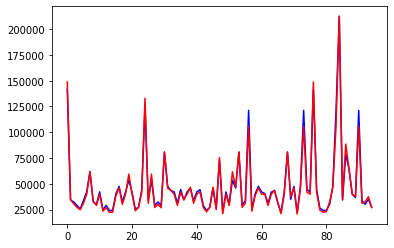

In [45]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, 
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                            max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                            bootstrap=True, oob_score=False, n_jobs=None, random_state=None, 
                            verbose=0, warm_start=False)
# defining parameter range 
param_grid = {'n_estimators' : [10, 50, 100, 200],
              'criterion': ['mse','friedman_mse', 'mae'],  
              'max_depth': [3,4,5,7,10,15, None ],
              'warm_start': ['True', 'False'],

             } 
'''
param_grid = {'n_estimators' : [10, 50, 100, 200],
              'criterion': ['mse','friedman_mse', 'mae'],  
              'max_depth': [3,4,5,7,10,15, None ],
              'max_features' : ['auto', 'sqrt', 'log2', None],
              'max_leaf_nodes' : [None, 10, 50, 100, 200], 
              'warm_start': ['True', 'False'],
              
             }'''
grid = GridSearchCV(reg, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
tqdm(grid.fit(X_train, Y_train)) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
print('\nMean Absolute Percentage Error =',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))

# 10 fold cross validation for best Decision Tree Regressor 

KFold(n_splits=10, random_state=42, shuffle=True)
(427, 22) (48, 22) (427,) (48,)
(427, 22) (48, 22) (427,) (48,)


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:307: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


(427, 22) (48, 22) (427,) (48,)


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:307: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


(427, 22) (48, 22) (427,) (48,)


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:307: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


(427, 22) (48, 22) (427,) (48,)


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:307: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


(428, 22) (47, 22) (428,) (47,)


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:307: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


(428, 22) (47, 22) (428,) (47,)


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:307: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


(428, 22) (47, 22) (428,) (47,)


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:307: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


(428, 22) (47, 22) (428,) (47,)


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:307: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


(428, 22) (47, 22) (428,) (47,)


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:307: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


MSE for 10 folds
 [877.4764583333407, 48681.42104166703, 48784.56166666703, 288.42854166666933, 49272.457708333706, 99810.14191489437, 169.41212765957488, 1.4038297872344263, 768.6882978723459, 216.27234042553266]

R2 scores for 10 folds
 [0.99999826793414, 0.9999656281578411, 0.9999455758673403, 0.9999997812361465, 0.9999716866108092, 0.9999331043843699, 0.9999999038910262, 0.9999999948468389, 0.9999987246070848, 0.9999998482892019]

MAPE for 10 folds
 [0.0002721313471386851, 0.0004106080863586767, 0.000464388174382173, 0.0001464062184445959, 0.0005433571173533818, 0.0010284213857307332, 9.240532444572289e-05, 6.488050166264673e-06, 0.0002151948681857195, 0.00012617473358604282]

MAE scores for 10 folds
 [7.118750000000091, 32.043750000000124, 33.325000000000124, 4.1270833333333785, 35.37708333333353, 70.20638297872365, 2.6872340425532535, 0.30638297872343523, 5.534042553191536, 3.327659574468116]

Mean MSE =  24887.026392730684 
Median MSE =  823.0823781028432

Mean R2 score = 0.9999

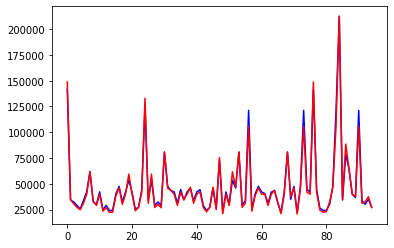

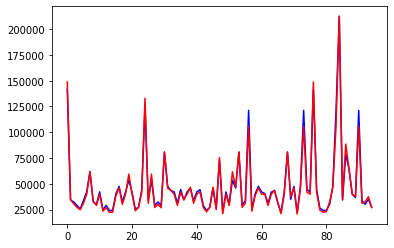

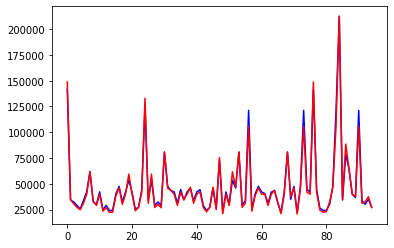

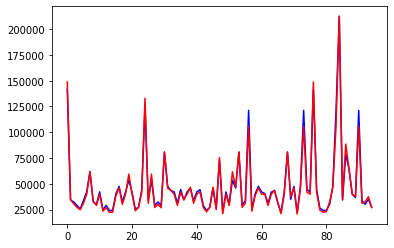

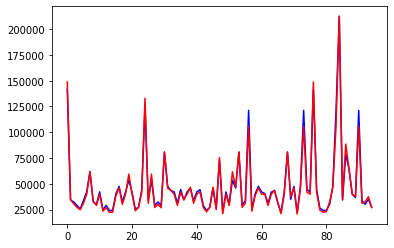

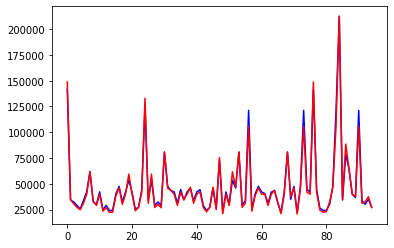

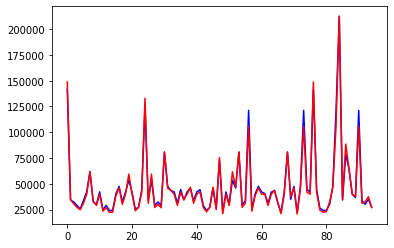

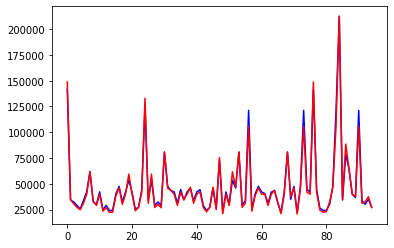

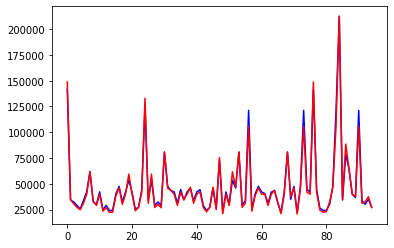

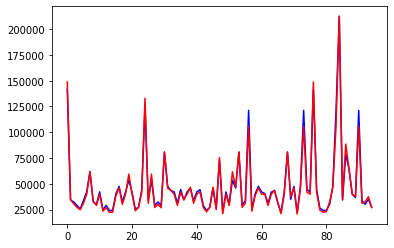

In [46]:
from sklearn.ensemble import RandomForestRegressor
reg_best = RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start='True')

r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
for train_index, test_index in cv.split(X):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    reg_best.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = reg_best.predict(X_test_fold)
    # scores.append(best_svr.score(X_test, y_test))
    
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')

    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMAE scores for 10 folds\n', mae_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))    
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))   

# 8. Extrememly Randomized Trees + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 168 candidates, totalling 504 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] criterion=mse, max_depth=3, n_estimators=10, warm_start=True ....
[CV]  criterion=mse, max_depth=3, n_estimators=10, warm_start=True, score=0.961, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=mse, max_depth=3, n_estimators=10, warm_start=True ....
[CV]  criterion=mse, max_depth=3, n_estimators=10, warm_start=True, score=0.970, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=mse, max_depth=3, n_estimators=10, warm_start=True ....
[CV]  criterion=mse, max_depth=3, n_estimators=10, warm_start=True, score=0.950, total=   0.0s
[CV] criterion=mse, max_depth=3, n_estimators=10, warm_start=False ...
[CV]  criterion=mse, max_depth=3, n_estimators=10, warm_start=False, score=0.961, total=   0.0s
[CV] criterion=mse, max_depth=3, n_estimators=10, warm_start=False ...
[CV]  criterion=mse, max_depth=3, n_estimators=10, warm_start=False, score=0.970, total=   0.0s
[CV] criterion=mse, max_depth=3, n_estimators=10, warm_start=False ...
[CV]  criterion=mse, max_depth=3, n_estimators=10, warm_start=False, score=0.950, total=   0.0s
[CV] criterion=mse, max_depth=3, n_estimators=50, warm_start=True ....
[CV]  criterion=mse, max_depth=3, n_estimators=50, warm_start=True, score=0.951, total=   0.1s
[CV] criterion=mse, max_depth=3, n_estimators=50, warm_start=True ....
[CV]  criterion=mse, max_depth=3, n_estimators=50, warm_start=True, score=0.977, total=   0.1s
[

[CV] criterion=mse, max_depth=10, n_estimators=10, warm_start=False ..
[CV]  criterion=mse, max_depth=10, n_estimators=10, warm_start=False, score=1.000, total=   0.0s
[CV] criterion=mse, max_depth=10, n_estimators=10, warm_start=False ..
[CV]  criterion=mse, max_depth=10, n_estimators=10, warm_start=False, score=0.997, total=   0.0s
[CV] criterion=mse, max_depth=10, n_estimators=50, warm_start=True ...
[CV]  criterion=mse, max_depth=10, n_estimators=50, warm_start=True, score=0.988, total=   0.1s
[CV] criterion=mse, max_depth=10, n_estimators=50, warm_start=True ...
[CV]  criterion=mse, max_depth=10, n_estimators=50, warm_start=True, score=1.000, total=   0.1s
[CV] criterion=mse, max_depth=10, n_estimators=50, warm_start=True ...
[CV]  criterion=mse, max_depth=10, n_estimators=50, warm_start=True, score=0.997, total=   0.1s
[CV] criterion=mse, max_depth=10, n_estimators=50, warm_start=False ..
[CV]  criterion=mse, max_depth=10, n_estimators=50, warm_start=False, score=0.988, total=   

[CV]  criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=True, score=0.982, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=False 
[CV]  criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=False, score=0.982, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=False 
[CV]  criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=False, score=0.992, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=False 
[CV]  criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=False, score=0.982, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=50, warm_start=True 
[CV]  criterion=friedman_mse, max_depth=4, n_estimators=50, warm_start=True, score=0.982, total=   0.1s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=50, warm_start=True 
[CV]  criterion=friedman_mse, max_depth=4, n_estimators=50, warm_start=True, score=0.996, tota

[CV]  criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=True, score=1.000, total=   0.4s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=True 
[CV]  criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=True, score=0.997, total=   0.3s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=False 
[CV]  criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=False, score=0.985, total=   0.3s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=False 
[CV]  criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=False, score=1.000, total=   0.4s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=False 
[CV]  criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=False, score=0.997, total=   0.3s
[CV] criterion=friedman_mse, max_depth=15, n_estimators=10, warm_start=True 
[CV]  criterion=friedman_mse, max_depth=15, n_estimators=10, warm_start=Tru

[CV] criterion=mae, max_depth=4, n_estimators=100, warm_start=False ..
[CV]  criterion=mae, max_depth=4, n_estimators=100, warm_start=False, score=0.975, total=   0.7s
[CV] criterion=mae, max_depth=4, n_estimators=100, warm_start=False ..
[CV]  criterion=mae, max_depth=4, n_estimators=100, warm_start=False, score=0.995, total=   0.7s
[CV] criterion=mae, max_depth=4, n_estimators=100, warm_start=False ..
[CV]  criterion=mae, max_depth=4, n_estimators=100, warm_start=False, score=0.990, total=   0.7s
[CV] criterion=mae, max_depth=4, n_estimators=200, warm_start=True ...
[CV]  criterion=mae, max_depth=4, n_estimators=200, warm_start=True, score=0.972, total=   1.4s
[CV] criterion=mae, max_depth=4, n_estimators=200, warm_start=True ...
[CV]  criterion=mae, max_depth=4, n_estimators=200, warm_start=True, score=0.993, total=   1.4s
[CV] criterion=mae, max_depth=4, n_estimators=200, warm_start=True ...
[CV]  criterion=mae, max_depth=4, n_estimators=200, warm_start=True, score=0.988, total=   

[CV]  criterion=mae, max_depth=15, n_estimators=100, warm_start=False, score=1.000, total=   1.1s
[CV] criterion=mae, max_depth=15, n_estimators=100, warm_start=False .
[CV]  criterion=mae, max_depth=15, n_estimators=100, warm_start=False, score=0.994, total=   1.1s
[CV] criterion=mae, max_depth=15, n_estimators=200, warm_start=True ..
[CV]  criterion=mae, max_depth=15, n_estimators=200, warm_start=True, score=0.985, total=   2.3s
[CV] criterion=mae, max_depth=15, n_estimators=200, warm_start=True ..
[CV]  criterion=mae, max_depth=15, n_estimators=200, warm_start=True, score=1.000, total=   2.2s
[CV] criterion=mae, max_depth=15, n_estimators=200, warm_start=True ..
[CV]  criterion=mae, max_depth=15, n_estimators=200, warm_start=True, score=0.994, total=   2.2s
[CV] criterion=mae, max_depth=15, n_estimators=200, warm_start=False .
[CV]  criterion=mae, max_depth=15, n_estimators=200, warm_start=False, score=0.985, total=   2.1s
[CV] criterion=mae, max_depth=15, n_estimators=200, warm_sta

[Parallel(n_jobs=1)]: Done 504 out of 504 | elapsed:  3.2min finished


{'criterion': 'mae', 'max_depth': 7, 'n_estimators': 10, 'warm_start': 'True'}
ExtraTreesRegressor(bootstrap=False, criterion='mae', max_depth=7,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=42, verbose=0,
                    warm_start='True')
MSE =  23803047.18436842
R2 score = 0.9760760620869388

Mean Absolute Percentage Error = 0.06341230425575425
Mean Absolute Error is: 3079.3378947368424


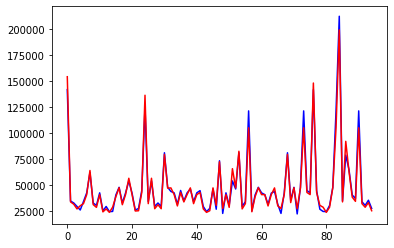

In [47]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=100, criterion='mse', max_depth=None, 
                          min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                          max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
                          min_impurity_split=None, bootstrap=False, oob_score=False, n_jobs=None, 
                          random_state=42, verbose=0, warm_start=False)

# defining parameter range 
param_grid = {'n_estimators' : [10, 50, 100, 200],
              'criterion': ['mse','friedman_mse', 'mae'],  
              'max_depth': [3,4,5,7,10,15, None ],
              'warm_start': ['True', 'False']
             }
   
'''param_grid = {'n_estimators' : [10, 50, 100, 200],
              'criterion': ['mse','friedman_mse', 'mae'],  
              'max_depth': [3,4,5,7,10,15, None ],
              'max_features' : ['auto', 'sqrt', 'log2', None],
              'max_leaf_nodes' : [None, 10, 50, 100, 200], 
              'warm_start': ['True', 'False'],
              'bootstrap' : ['True', 'False'],
              'oob_score' :['True', 'False']
             } '''
grid = GridSearchCV(reg, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
print('\nMean Absolute Percentage Error =',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))

# 10 fold cross validation for best Extra Trees Regressor 

KFold(n_splits=10, random_state=42, shuffle=True)
(427, 22) (48, 22) (427,) (48,)
(427, 22) (48, 22) (427,) (48,)


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:307: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


(427, 22) (48, 22) (427,) (48,)


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:307: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


(427, 22) (48, 22) (427,) (48,)


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:307: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


(427, 22) (48, 22) (427,) (48,)


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:307: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


(428, 22) (47, 22) (428,) (47,)


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:307: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


(428, 22) (47, 22) (428,) (47,)


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:307: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


(428, 22) (47, 22) (428,) (47,)


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:307: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


(428, 22) (47, 22) (428,) (47,)


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:307: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


(428, 22) (47, 22) (428,) (47,)


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:307: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


MSE for 10 folds
 [421861.253489583, 216111.75380208317, 259716.20630208252, 519454.9830729161, 161534.92755208295, 344654.0846808505, 178581.91755319128, 357950.05962765904, 189998.3321276593, 434908.26984042476]

R2 scores for 10 folds
 [0.9991672808223315, 0.9998474128541973, 0.9997102601974323, 0.999606009956042, 0.999907177326149, 0.9997690029617048, 0.999898688924605, 0.9986860413236673, 0.9996847584028964, 0.9996949203925467]

MAPE for 10 folds
 [0.011806862185450117, 0.00799435032416697, 0.0075282689641076655, 0.011853378253733138, 0.007066782005171212, 0.009238515814135862, 0.007774969967483427, 0.008856403540918904, 0.009529936717332271, 0.009203208785462758]

MAE scores for 10 folds
 [450.4385416666664, 301.10104166666673, 288.0197916666659, 478.3864583333331, 273.2364583333329, 330.71063829787215, 269.087234042553, 344.42021276595744, 330.0531914893614, 380.8776595744677]

Mean MSE =  308477.1788048533 
Median MSE =  302185.1454914665

Mean R2 score = 0.9995971553161571 
Me

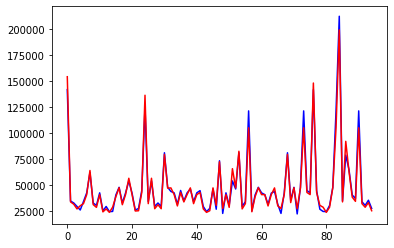

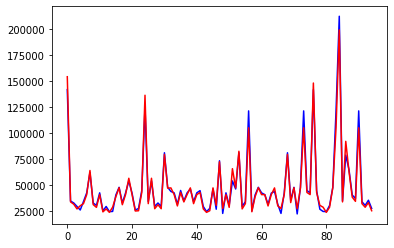

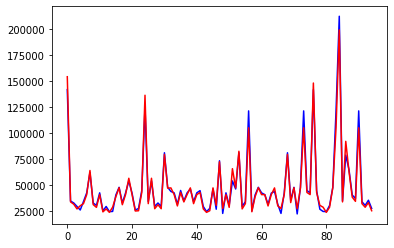

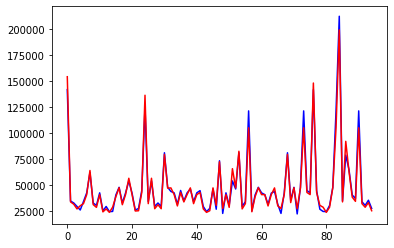

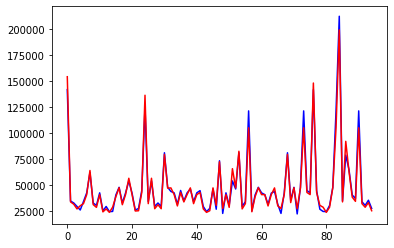

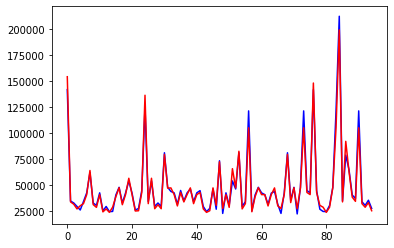

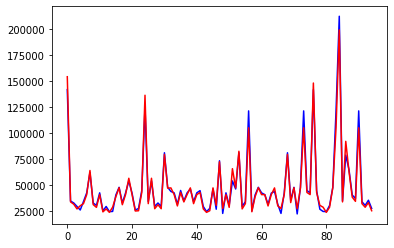

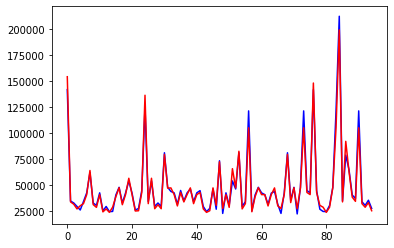

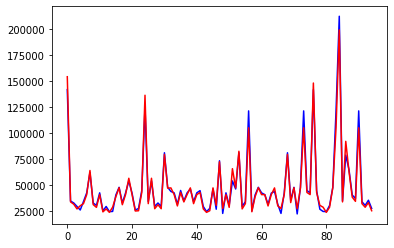

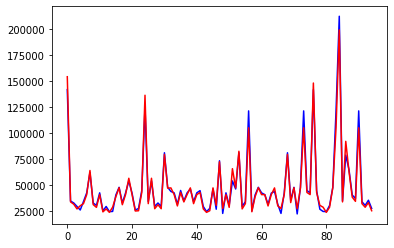

In [48]:
from sklearn.ensemble import ExtraTreesRegressor
reg_best = ExtraTreesRegressor(bootstrap=False, criterion='mae', max_depth=7,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=42, verbose=0,
                    warm_start='True')

r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
for train_index, test_index in cv.split(X):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    reg_best.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = reg_best.predict(X_test_fold)
    # scores.append(best_svr.score(X_test, y_test))
    
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')

    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMAE scores for 10 folds\n', mae_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))    
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))   

# 9. Gradient boosting regression + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 336 candidates, totalling 1008 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=10 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=10, score=0.849, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=10 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=10, score=0.869, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=10 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=10, score=0.858, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=20 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=20, score=0.971, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=20 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=20, score=0.983, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=20 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=20, score=0.978, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=50 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=50, score=0.996, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=50 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=50, score=1.000, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimato

[CV]  criterion=mse, loss=lad, max_depth=4, n_estimators=50, score=0.898, total=   0.1s
[CV] criterion=mse, loss=lad, max_depth=4, n_estimators=100 ..........
[CV]  criterion=mse, loss=lad, max_depth=4, n_estimators=100, score=0.907, total=   0.2s
[CV] criterion=mse, loss=lad, max_depth=4, n_estimators=100 ..........
[CV]  criterion=mse, loss=lad, max_depth=4, n_estimators=100, score=0.961, total=   0.2s
[CV] criterion=mse, loss=lad, max_depth=4, n_estimators=100 ..........
[CV]  criterion=mse, loss=lad, max_depth=4, n_estimators=100, score=0.927, total=   0.2s
[CV] criterion=mse, loss=lad, max_depth=5, n_estimators=10 ...........
[CV]  criterion=mse, loss=lad, max_depth=5, n_estimators=10, score=0.091, total=   0.0s
[CV] criterion=mse, loss=lad, max_depth=5, n_estimators=10 ...........
[CV]  criterion=mse, loss=lad, max_depth=5, n_estimators=10, score=0.229, total=   0.0s
[CV] criterion=mse, loss=lad, max_depth=5, n_estimators=10 ...........
[CV]  criterion=mse, loss=lad, max_depth=5,

[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=10 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=10, score=0.842, total=   0.1s
[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=20 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=20, score=0.897, total=   0.2s
[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=20 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=20, score=0.935, total=   0.2s
[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=20 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=20, score=0.974, total=   0.2s
[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=50 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=50, score=0.982, total=   0.7s
[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=50 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=50, score=0.987, total=   0.7s
[CV] criterion=mse, loss=huber, ma

[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=20, score=0.576, total=   0.0s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=50 .....
[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=50, score=0.919, total=   0.1s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=50 .....
[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=50, score=0.921, total=   0.1s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=50 .....
[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=50, score=0.833, total=   0.1s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=100 ....
[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=100, score=0.975, total=   0.4s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=100 ....
[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=100, score=0.983, total=   0.3s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=100 ....
[CV]  cr

[CV] criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=50 ..
[CV]  criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=50, score=1.000, total=   0.1s
[CV] criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=50 ..
[CV]  criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=50, score=0.999, total=   0.1s
[CV] criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100, score=0.997, total=   0.2s
[CV] criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100, score=1.000, total=   0.2s
[CV] criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100, score=0.999, total=   0.2s
[CV] criterion=friedman_mse, loss=ls, max_depth=None, n_estimators=10 
[CV]  criterion=friedman_mse, loss=ls, max_depth=None, n_estimators=10, score=0.870, t

[CV]  criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=50, score=0.992, total=   0.3s
[CV] criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=50 
[CV]  criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=50, score=0.965, total=   0.3s
[CV] criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100 
[CV]  criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100, score=0.975, total=   1.0s
[CV] criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100 
[CV]  criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100, score=1.000, total=   1.1s
[CV] criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100 
[CV]  criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100, score=0.991, total=   1.1s
[CV] criterion=friedman_mse, loss=huber, max_depth=3, n_estimators=10 
[CV]  criterion=friedman_mse, loss=huber, max_depth=3, n_estimators=10, score=0.706, total=   0.0s
[CV] criterion=friedman_mse, loss=hu

[CV]  criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=50, score=0.991, total=   0.6s
[CV] criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=50 
[CV]  criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=50, score=0.998, total=   0.6s
[CV] criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100 
[CV]  criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100, score=0.988, total=   1.2s
[CV] criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100 
[CV]  criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100, score=0.992, total=   1.5s
[CV] criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100 
[CV]  criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100, score=0.999, total=   1.4s
[CV] criterion=friedman_mse, loss=huber, max_depth=10, n_estimators=10 
[CV]  criterion=friedman_mse, loss=huber, max_depth=10, n_estimators=10, score=0.727, total=   0.2s
[CV] criterion=friedman_mse, loss=huber, ma

[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=20, score=0.793, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=20 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=20, score=0.576, total=   0.0s
[CV] criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50, score=0.921, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50, score=0.921, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50, score=0.833, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=100 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=100, score=0.978, total=   0.3s
[CV] 

[CV] criterion=mae, loss=ls, max_depth=15, n_estimators=50 ...........
[CV]  criterion=mae, loss=ls, max_depth=15, n_estimators=50, score=1.000, total=   0.6s
[CV] criterion=mae, loss=ls, max_depth=15, n_estimators=50 ...........
[CV]  criterion=mae, loss=ls, max_depth=15, n_estimators=50, score=1.000, total=   0.6s
[CV] criterion=mae, loss=ls, max_depth=15, n_estimators=100 ..........
[CV]  criterion=mae, loss=ls, max_depth=15, n_estimators=100, score=0.999, total=   1.3s
[CV] criterion=mae, loss=ls, max_depth=15, n_estimators=100 ..........
[CV]  criterion=mae, loss=ls, max_depth=15, n_estimators=100, score=1.000, total=   1.3s
[CV] criterion=mae, loss=ls, max_depth=15, n_estimators=100 ..........
[CV]  criterion=mae, loss=ls, max_depth=15, n_estimators=100, score=1.000, total=   1.2s
[CV] criterion=mae, loss=ls, max_depth=None, n_estimators=10 .........
[CV]  criterion=mae, loss=ls, max_depth=None, n_estimators=10, score=0.874, total=   0.1s
[CV] criterion=mae, loss=ls, max_depth=No

[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=10 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=10, score=0.716, total=   0.1s
[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=10 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=10, score=0.771, total=   0.1s
[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=20 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=20, score=0.854, total=   0.2s
[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=20 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=20, score=0.879, total=   0.2s
[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=20 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=20, score=0.901, total=   0.2s
[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=50 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=50, score=0.936, total=   0.5s
[CV] criterion=mae, loss=huber, ma

[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=20, score=0.602, total=   0.2s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=50 ......
[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=50, score=0.968, total=   0.4s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=50 ......
[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=50, score=0.954, total=   0.5s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=50 ......
[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=50, score=0.884, total=   0.4s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=100 .....
[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=100, score=0.982, total=   0.8s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=100 .....
[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=100, score=0.970, total=   0.8s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=100 .....
[CV]  criterio

[Parallel(n_jobs=1)]: Done 1008 out of 1008 | elapsed:  6.0min finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'mse', 'loss': 'ls', 'max_depth': 4, 'n_estimators': 100}
GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
MSE =  3644214.6556130326
R2 score = 0.9963372771356767

Mean Absolute Percentage Error = 0.04613145286254516
Mean Absolute Error is: 1720.1041773867566


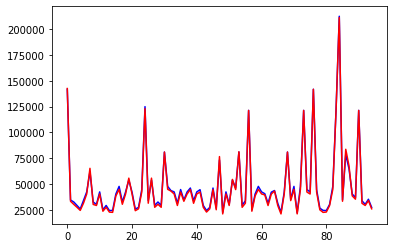

In [49]:
from sklearn import ensemble
reg = ensemble.GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100,
                                         subsample=1.0, criterion='friedman_mse', min_samples_split=2,
                                         min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                                         min_impurity_decrease=0.0, min_impurity_split=None, 
                                         init=None, random_state= 42, max_features=None, 
                                         alpha=0.9, verbose=0, max_leaf_nodes=None, 
                                         warm_start=False, validation_fraction=0.1, n_iter_no_change=None, 
                                         tol=0.0001)
# defining parameter range
param_grid = {'n_estimators' : [10, 20, 50, 100],
              
              'criterion': ['mse','friedman_mse', 'mae'],  
              'max_depth': [3,4,5,7,10,15, None ],
              'loss' : ['ls', 'lad', 'huber', 'quantile'],
             }
'''param_grid = {'n_estimators' : [10, 20, 50, 100],
              'criterion': ['mse','friedman_mse', 'mae'],  
              'max_depth': [3,4,5,7,10,15 None ],
              'max_features' : ['auto', 'sqrt', 'log2', None],
              'max_leaf_nodes' : [None, 10, 20,50, 100], 
              'warm_start': ['True', 'False'],
              'loss' : ['ls', 'lad', 'huber', 'quantile'],
              'learning_rate' : [0.1, 0.5, 0.01, 0.001, 0.0001],
              'subsample': [0.2, 0.4, 0.6, 0.8, 1],
              'validation_fraction': [0.2, 0.1, 0.3, 0.4]
             } '''
grid = GridSearchCV(reg, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
print('\nMean Absolute Percentage Error =',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))

# 10 fold cross validation for best GBR

KFold(n_splits=10, random_state=42, shuffle=True)
(427, 22) (48, 22) (427,) (48,)
(427, 22) (48, 22) (427,) (48,)
(427, 22) (48, 22) (427,) (48,)
(427, 22) (48, 22) (427,) (48,)
(427, 22) (48, 22) (427,) (48,)
(428, 22) (47, 22) (428,) (47,)
(428, 22) (47, 22) (428,) (47,)
(428, 22) (47, 22) (428,) (47,)
(428, 22) (47, 22) (428,) (47,)
(428, 22) (47, 22) (428,) (47,)
MSE for 10 folds
 [3548.915657720401, 2897.2133665758242, 2596.2150820364427, 3308.0588387225253, 3608.33928039167, 2519.252959663323, 2486.5737446402727, 1638.1579403756596, 2679.673004506356, 7699.817752153319]

R2 scores for 10 folds
 [0.9999929947343975, 0.9999979544031705, 0.9999971036584278, 0.9999974909428347, 0.9999979265431617, 0.9999983115245161, 0.9999985893450828, 0.9999939866699807, 0.9999955539378257, 0.999994598729111]

MAPE for 10 folds
 [0.0011332384563060684, 0.0008794060714641144, 0.0011129065747883101, 0.001032462859213802, 0.0012297329135990869, 0.0009771722718385785, 0.0008843131984451574, 0.000918300

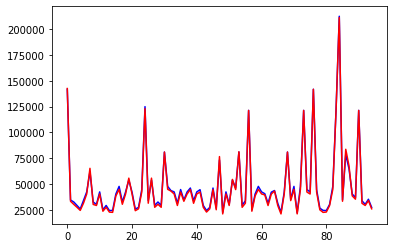

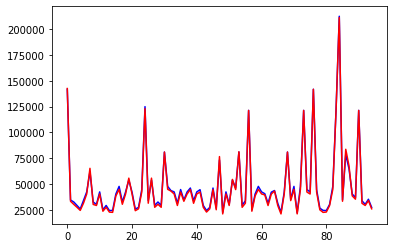

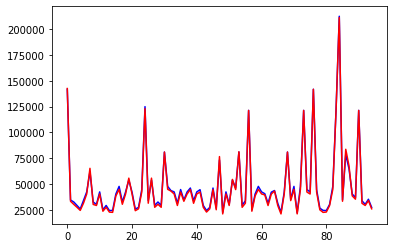

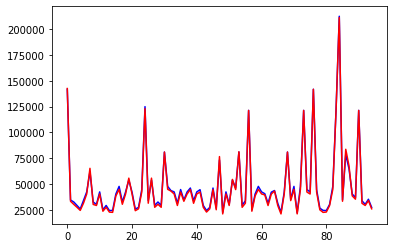

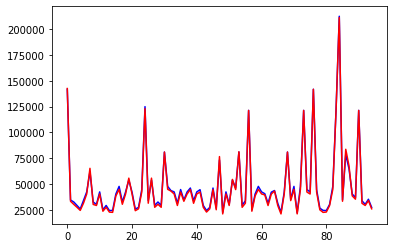

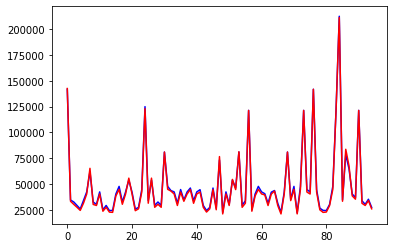

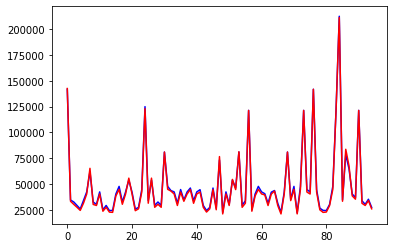

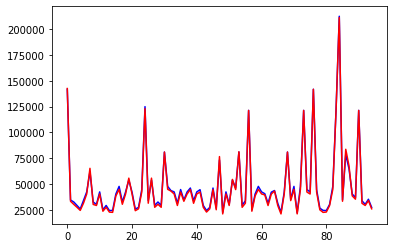

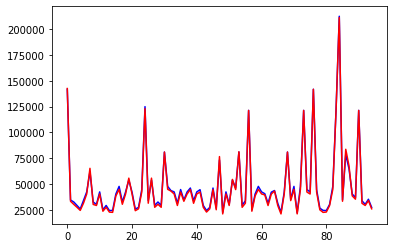

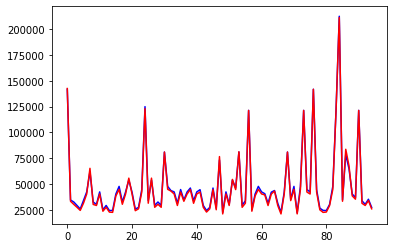

In [51]:
from sklearn import ensemble
reg_best = ensemble.GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
for train_index, test_index in cv.split(X):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    reg_best.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = reg_best.predict(X_test_fold)
    # scores.append(best_svr.score(X_test, y_test))
    
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')

    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMAE scores for 10 folds\n', mae_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))    
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))   

# 10. XGB Boost + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] learning_rate=0.1, max_depth=3, n_estimators=10 .................
[11:36:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=10, score=0.439, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] learning_rate=0.1, max_depth=3, n_estimators=10 .................
[11:36:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=10, score=0.536, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] learning_rate=0.1, max_depth=3, n_estimators=10 .................
[11:36:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=10, score=0.468, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=20 .................
[11:36:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=20, score=0.844, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=20 .................
[11:36:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=20, score=0.887, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators

[11:36:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=10, n_estimators=20, score=0.888, total=   0.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50 ................
[11:36:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=10, n_estimators=50, score=0.975, total=   0.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50 ................
[11:36:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=10, n_estimators=50, score=0.992, total=   0.1s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50 ................
[11:36:48] WARNING: C:/Jenkins/workspace/xgboo

[11:36:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=5, n_estimators=50, score=0.994, total=   0.0s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100 ................
[11:36:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100, score=0.985, total=   0.1s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100 ................
[11:36:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100, score=1.000, total=   0.1s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100 ................
[11:36:51] WARNING: C:/Jenkins/workspace/xgboos

[11:36:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=3, n_estimators=100, score=0.438, total=   0.1s
[CV] learning_rate=0.01, max_depth=4, n_estimators=10 ................
[11:36:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=4, n_estimators=10, score=-1.422, total=   0.0s
[CV] learning_rate=0.01, max_depth=4, n_estimators=10 ................
[11:36:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=4, n_estimators=10, score=-1.345, total=   0.0s
[CV] learning_rate=0.01, max_depth=4, n_estimators=10 ................
[11:36:54] WARNING: C:/Jenkins/workspace/xg

[11:36:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=15, n_estimators=10, score=-1.707, total=   0.0s
[CV] learning_rate=0.01, max_depth=15, n_estimators=20 ...............
[11:36:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=15, n_estimators=20, score=-1.050, total=   0.0s
[CV] learning_rate=0.01, max_depth=15, n_estimators=20 ...............
[11:36:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=15, n_estimators=20, score=-0.972, total=   0.0s
[CV] learning_rate=0.01, max_depth=15, n_estimators=20 ...............
[11:36:56] WARNING: C:/Jenkins/workspace

[11:36:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=7, n_estimators=20, score=-2.127, total=   0.0s
[CV] learning_rate=0.001, max_depth=7, n_estimators=50 ...............
[11:36:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=7, n_estimators=50, score=-1.633, total=   0.0s
[CV] learning_rate=0.001, max_depth=7, n_estimators=50 ...............
[11:36:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=7, n_estimators=50, score=-1.567, total=   0.0s
[CV] learning_rate=0.001, max_depth=7, n_estimators=50 ...............
[11:36:58] WARNING: C:/Jenkins/workspace

[11:36:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=4, n_estimators=50, score=-2.213, total=   0.1s
[CV] learning_rate=0.0001, max_depth=4, n_estimators=100 .............
[11:36:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=4, n_estimators=100, score=-1.819, total=   0.1s
[CV] learning_rate=0.0001, max_depth=4, n_estimators=100 .............
[11:36:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=4, n_estimators=100, score=-1.755, total=   0.1s
[CV] learning_rate=0.0001, max_depth=4, n_estimators=100 .............
[11:37:00] WARNING: C:/Jenkins/work

[11:37:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=15, n_estimators=100, score=-1.755, total=   0.1s
[CV] learning_rate=0.0001, max_depth=15, n_estimators=100 ............
[11:37:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=15, n_estimators=100, score=-2.184, total=   0.1s


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   15.8s finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[11:37:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 100}
XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, validate_parameters=False, verbosity=1)
MSE =  41305783.71413265
R2 score = 0.9584844327966464

Mean Absolute Percentage Error = 0.058263532886519066
Mean Absolute Error is: 3298.066015625


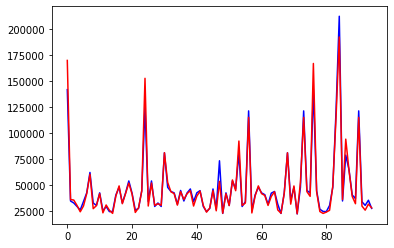

In [52]:
import xgboost as xgb
# data_dmatrix = xgb.DMatrix(data=X_train,label=Y_train)
reg = xgb.XGBRegressor(booster = 'gbtree',validate_parameters = False,  
                objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
# defining parameter range 
param_grid = {'n_estimators' : [10, 20, 50, 100], 
              'max_depth': [3,4,5,7,10,15],
              'learning_rate' : [0.1, 0.5, 0.01, 0.001, 0.0001]      
             } 
grid = GridSearchCV(reg, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
print('\nMean Absolute Percentage Error =',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))

# # 10 fold cross validation for best XGB 

KFold(n_splits=10, random_state=42, shuffle=True)
(427, 22) (48, 22) (427,) (48,)
[11:38:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(427, 22) (48, 22) (427,) (48,)
[11:38:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(427, 22) (48, 22) (427,) (48,)
[11:38:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(427, 22) (48, 22) (427,) (48,)
[11:38:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(427, 22) (48, 22) (427,) (48,)
[11:38:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated 

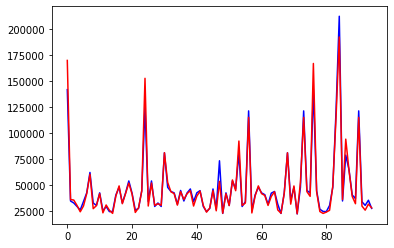

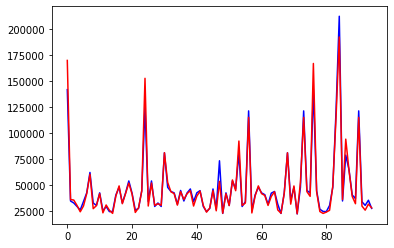

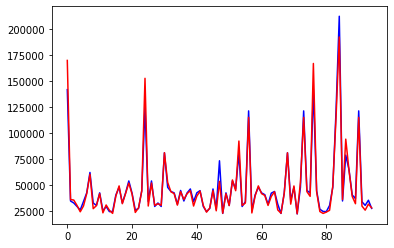

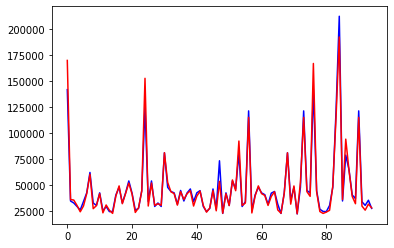

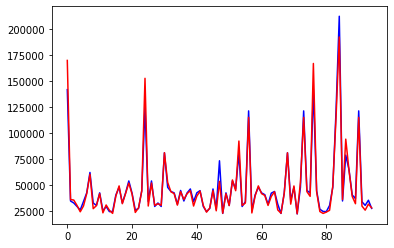

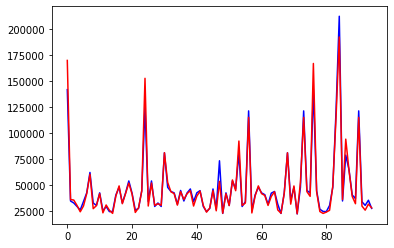

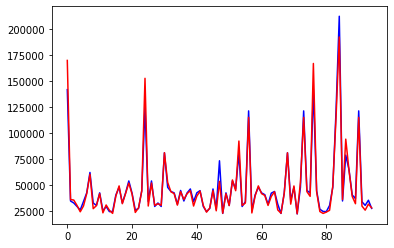

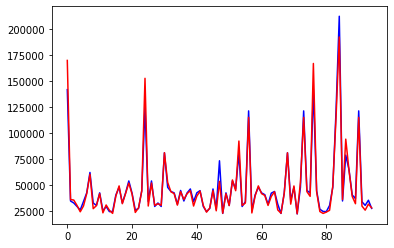

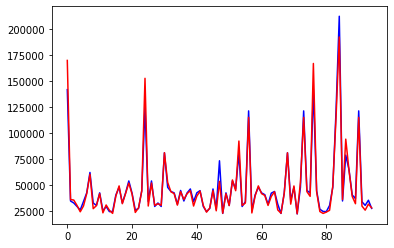

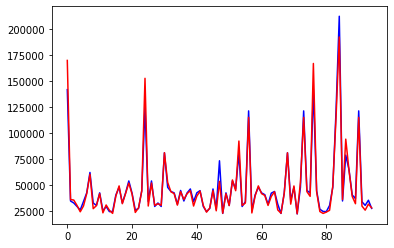

In [53]:
import xgboost as xgb
# data_dmatrix = xgb.DMatrix(data=X_train,label=Y_train)
reg_best = xgb.XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, validate_parameters=False, verbosity=1)
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
for train_index, test_index in cv.split(X):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    reg_best.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = reg_best.predict(X_test_fold)
    # scores.append(best_svr.score(X_test, y_test))
    
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')

    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMAE scores for 10 folds\n', mae_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))    
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))    

# 11. DNN_1

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               11776     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513       
Total params: 12,289
Trainable params: 12,289
Non-trainable params: 0
_________________________________________________________________
None
KFold(n_splits=10, random_state=42, shuffle=True)
(427, 22) (48, 22) (427,) (48,)
Epoch 1/100
 - 0s - loss: 47419.3421 - mae: 47419.3477
Epoch 2/100
 - 0s - loss: 43384.5266 - mae: 43384.5352
Epoch 3/100
 - 0s - loss: 35385.6685 - mae: 35385.6758
Epoch 4/100
 - 0s - loss: 27769.2738 - mae: 27769.2754
Epoch 5/100
 - 0s - loss: 25258.7119 - mae: 25258.7070
Epoch 6/100
 - 0s - loss: 24955.5850 - mae: 24955.5840
Epoch 7/100
 - 0s - loss: 24837.1208 - mae: 24837.1250
Epoch 8/100
 - 0s - loss: 24722.9404 - m

Epoch 35/100
 - 0s - loss: 11132.1872 - mae: 11132.1875
Epoch 36/100
 - 0s - loss: 11074.3335 - mae: 11074.3340
Epoch 37/100
 - 0s - loss: 11013.8540 - mae: 11013.8564
Epoch 38/100
 - 0s - loss: 11029.8923 - mae: 11029.8906
Epoch 39/100
 - 0s - loss: 10942.1516 - mae: 10942.1514
Epoch 40/100
 - 0s - loss: 10905.1375 - mae: 10905.1367
Epoch 41/100
 - 0s - loss: 10836.5550 - mae: 10836.5537
Epoch 42/100
 - 0s - loss: 10789.0091 - mae: 10789.0098
Epoch 43/100
 - 0s - loss: 10767.5596 - mae: 10767.5596
Epoch 44/100
 - 0s - loss: 10737.9079 - mae: 10737.9082
Epoch 45/100
 - 0s - loss: 10689.3985 - mae: 10689.3984
Epoch 46/100
 - 0s - loss: 10600.5880 - mae: 10600.5869
Epoch 47/100
 - 0s - loss: 10617.4595 - mae: 10617.4580
Epoch 48/100
 - 0s - loss: 10510.0334 - mae: 10510.0332
Epoch 49/100
 - 0s - loss: 10485.4936 - mae: 10485.4941
Epoch 50/100
 - 0s - loss: 10397.0286 - mae: 10397.0283
Epoch 51/100
 - 0s - loss: 10312.5428 - mae: 10312.5420
Epoch 52/100
 - 0s - loss: 10370.2885 - mae: 103

Epoch 86/100
 - 0s - loss: 8240.0043 - mae: 8240.0039
Epoch 87/100
 - 0s - loss: 8204.4436 - mae: 8204.4434
Epoch 88/100
 - 0s - loss: 8239.7010 - mae: 8239.7021
Epoch 89/100
 - 0s - loss: 8265.4315 - mae: 8265.4316
Epoch 90/100
 - 0s - loss: 8200.7399 - mae: 8200.7393
Epoch 91/100
 - 0s - loss: 8276.6495 - mae: 8276.6484
Epoch 92/100
 - 0s - loss: 8240.5884 - mae: 8240.5889
Epoch 93/100
 - 0s - loss: 8260.8624 - mae: 8260.8623
Epoch 94/100
 - 0s - loss: 8171.9646 - mae: 8171.9644
Epoch 95/100
 - 0s - loss: 8155.8865 - mae: 8155.8872
Epoch 96/100
 - 0s - loss: 8157.1373 - mae: 8157.1372
Epoch 97/100
 - 0s - loss: 8170.4210 - mae: 8170.4199
Epoch 98/100
 - 0s - loss: 8181.5249 - mae: 8181.5259
Epoch 99/100
 - 0s - loss: 8155.2768 - mae: 8155.2769
Epoch 100/100
 - 0s - loss: 8124.9892 - mae: 8124.9893
(427, 22) (48, 22) (427,) (48,)
Epoch 1/100
 - 0s - loss: 7974.1679 - mae: 7974.1680
Epoch 2/100
 - 0s - loss: 8000.7339 - mae: 8000.7329
Epoch 3/100
 - 0s - loss: 7994.8672 - mae: 7994.866

Epoch 37/100
 - 0s - loss: 7224.4374 - mae: 7224.4380
Epoch 38/100
 - 0s - loss: 7228.7898 - mae: 7228.7886
Epoch 39/100
 - 0s - loss: 7220.0960 - mae: 7220.0962
Epoch 40/100
 - 0s - loss: 7223.3737 - mae: 7223.3735
Epoch 41/100
 - 0s - loss: 7193.2024 - mae: 7193.2021
Epoch 42/100
 - 0s - loss: 7194.9374 - mae: 7194.9370
Epoch 43/100
 - 0s - loss: 7218.9834 - mae: 7218.9829
Epoch 44/100
 - 0s - loss: 7235.3686 - mae: 7235.3677
Epoch 45/100
 - 0s - loss: 7240.4854 - mae: 7240.4854
Epoch 46/100
 - 0s - loss: 7303.0370 - mae: 7303.0371
Epoch 47/100
 - 0s - loss: 7187.1668 - mae: 7187.1675
Epoch 48/100
 - 0s - loss: 7151.1818 - mae: 7151.1816
Epoch 49/100
 - 0s - loss: 7164.9062 - mae: 7164.9067
Epoch 50/100
 - 0s - loss: 7177.7065 - mae: 7177.7070
Epoch 51/100
 - 0s - loss: 7140.1957 - mae: 7140.1953
Epoch 52/100
 - 0s - loss: 7146.8840 - mae: 7146.8833
Epoch 53/100
 - 0s - loss: 7153.5655 - mae: 7153.5659
Epoch 54/100
 - 0s - loss: 7117.3474 - mae: 7117.3477
Epoch 55/100
 - 0s - loss: 7

Epoch 89/100
 - 0s - loss: 6503.7379 - mae: 6503.7378
Epoch 90/100
 - 0s - loss: 6471.6959 - mae: 6471.6968
Epoch 91/100
 - 0s - loss: 6519.0657 - mae: 6519.0654
Epoch 92/100
 - 0s - loss: 6480.0084 - mae: 6480.0083
Epoch 93/100
 - 0s - loss: 6558.2574 - mae: 6558.2568
Epoch 94/100
 - 0s - loss: 6480.3709 - mae: 6480.3711
Epoch 95/100
 - 0s - loss: 6456.5594 - mae: 6456.5601
Epoch 96/100
 - 0s - loss: 6493.0583 - mae: 6493.0586
Epoch 97/100
 - 0s - loss: 6532.9101 - mae: 6532.9097
Epoch 98/100
 - 0s - loss: 6453.7714 - mae: 6453.7710
Epoch 99/100
 - 0s - loss: 6464.4846 - mae: 6464.4854
Epoch 100/100
 - 0s - loss: 6427.2925 - mae: 6427.2920
(428, 22) (47, 22) (428,) (47,)
Epoch 1/100
 - 0s - loss: 6362.7185 - mae: 6362.7178
Epoch 2/100
 - 0s - loss: 6281.5410 - mae: 6281.5410
Epoch 3/100
 - 0s - loss: 6260.3628 - mae: 6260.3633
Epoch 4/100
 - 0s - loss: 6257.3719 - mae: 6257.3716
Epoch 5/100
 - 0s - loss: 6230.1529 - mae: 6230.1519
Epoch 6/100
 - 0s - loss: 6240.4860 - mae: 6240.4858
E

Epoch 40/100
 - 0s - loss: 5875.6355 - mae: 5875.6357
Epoch 41/100
 - 0s - loss: 5849.3736 - mae: 5849.3721
Epoch 42/100
 - 0s - loss: 5815.9244 - mae: 5815.9248
Epoch 43/100
 - 0s - loss: 5874.3426 - mae: 5874.3428
Epoch 44/100
 - 0s - loss: 5836.9073 - mae: 5836.9072
Epoch 45/100
 - 0s - loss: 5832.4902 - mae: 5832.4907
Epoch 46/100
 - 0s - loss: 5903.0523 - mae: 5903.0518
Epoch 47/100
 - 0s - loss: 5850.3908 - mae: 5850.3901
Epoch 48/100
 - 0s - loss: 5855.9009 - mae: 5855.9009
Epoch 49/100
 - 0s - loss: 5835.2779 - mae: 5835.2773
Epoch 50/100
 - 0s - loss: 5809.4310 - mae: 5809.4321
Epoch 51/100
 - 0s - loss: 5791.1295 - mae: 5791.1304
Epoch 52/100
 - 0s - loss: 5834.1626 - mae: 5834.1636
Epoch 53/100
 - 0s - loss: 5850.9823 - mae: 5850.9819
Epoch 54/100
 - 0s - loss: 5814.0576 - mae: 5814.0571
Epoch 55/100
 - 0s - loss: 5883.6369 - mae: 5883.6367
Epoch 56/100
 - 0s - loss: 5766.6506 - mae: 5766.6509
Epoch 57/100
 - 0s - loss: 5815.4136 - mae: 5815.4131
Epoch 58/100
 - 0s - loss: 5

Epoch 92/100
 - 0s - loss: 5430.3381 - mae: 5430.3384
Epoch 93/100
 - 0s - loss: 5423.6474 - mae: 5423.6479
Epoch 94/100
 - 0s - loss: 5468.3559 - mae: 5468.3560
Epoch 95/100
 - 0s - loss: 5395.1276 - mae: 5395.1274
Epoch 96/100
 - 0s - loss: 5348.8026 - mae: 5348.8037
Epoch 97/100
 - 0s - loss: 5356.6446 - mae: 5356.6450
Epoch 98/100
 - 0s - loss: 5360.0952 - mae: 5360.0952
Epoch 99/100
 - 0s - loss: 5343.5088 - mae: 5343.5093
Epoch 100/100
 - 0s - loss: 5344.3177 - mae: 5344.3179
(428, 22) (47, 22) (428,) (47,)
Epoch 1/100
 - 0s - loss: 4986.1584 - mae: 4986.1582
Epoch 2/100
 - 0s - loss: 4960.6496 - mae: 4960.6494
Epoch 3/100
 - 0s - loss: 4999.1827 - mae: 4999.1836
Epoch 4/100
 - 0s - loss: 4985.5926 - mae: 4985.5928
Epoch 5/100
 - 0s - loss: 4987.7006 - mae: 4987.7002
Epoch 6/100
 - 0s - loss: 5035.2444 - mae: 5035.2451
Epoch 7/100
 - 0s - loss: 5038.4984 - mae: 5038.4976
Epoch 8/100
 - 0s - loss: 4975.4728 - mae: 4975.4727
Epoch 9/100
 - 0s - loss: 4953.6157 - mae: 4953.6157
Epoc

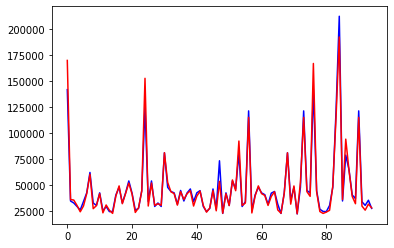

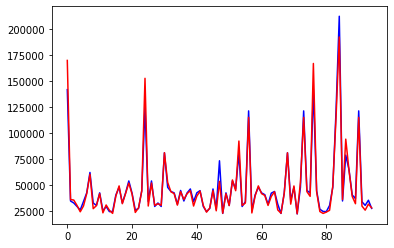

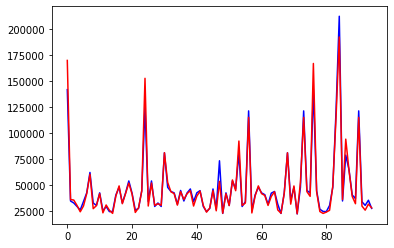

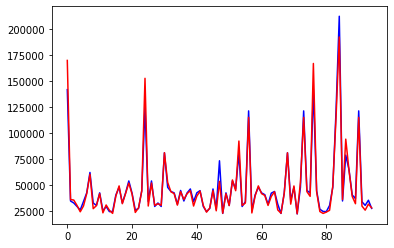

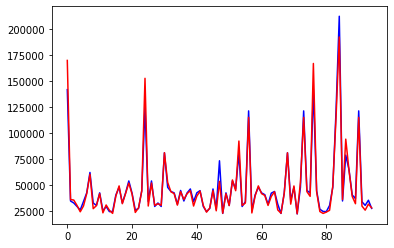

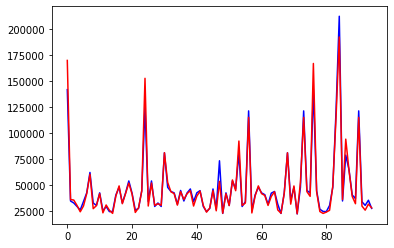

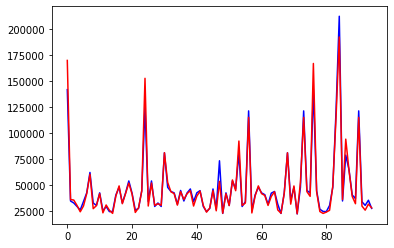

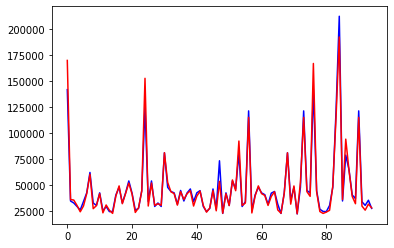

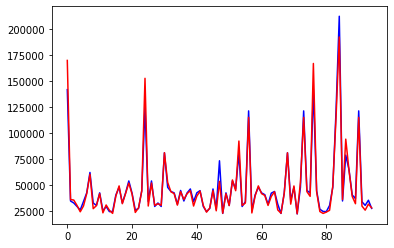

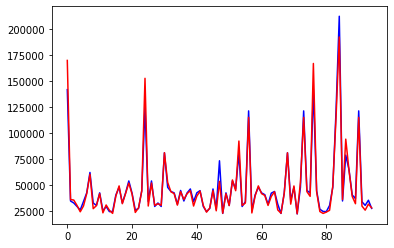

In [55]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(512, input_dim=22, activation='relu'))
model.add(Dense(1, activation='linear'))
print(model.summary())
# compile the keras model
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
k = 1
for train_index, test_index in cv.split(X):
    print('*******************Fold number************************: ',k)
    k = k+1    
    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    # fit the keras model on the dataset
    model.fit(X_train_fold, Y_train_fold, epochs=100, batch_size=10, verbose = 2)
    Y_pred_fold = model.predict(X_test_fold)
    plt.figure()
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')

    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
    
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))   
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))    

# DNN_2

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               11776     
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 537,601
Trainable params: 537,601
Non-trainable params: 0
_________________________________________________________________
None
KFold(n_splits=10, random_state=42, shuffle=True)
(427, 22) (48, 22) (427,) (48,)
Epoch 1/100
 - 1s - loss: 32899.6325 - mae: 32899.6367
Epoch 2/100
 - 1s - loss: 24260.5230 - mae: 24260.5254
Epoch 3/100
 - 1s - loss: 23603.3106 - mae: 23603

Epoch 86/100
 - 1s - loss: 2309.4660 - mae: 2309.4658
Epoch 87/100
 - 1s - loss: 2217.6198 - mae: 2217.6196
Epoch 88/100
 - 1s - loss: 2416.7007 - mae: 2416.7004
Epoch 89/100
 - 1s - loss: 2320.5114 - mae: 2320.5115
Epoch 90/100
 - 1s - loss: 2307.2050 - mae: 2307.2053
Epoch 91/100
 - 1s - loss: 3003.6278 - mae: 3003.6279
Epoch 92/100
 - 1s - loss: 2541.3620 - mae: 2541.3618
Epoch 93/100
 - 1s - loss: 2293.2390 - mae: 2293.2393
Epoch 94/100
 - 1s - loss: 3647.3432 - mae: 3647.3430
Epoch 95/100
 - 1s - loss: 2693.2481 - mae: 2693.2483
Epoch 96/100
 - 1s - loss: 2438.0092 - mae: 2438.0093
Epoch 97/100
 - 1s - loss: 2705.0790 - mae: 2705.0789
Epoch 98/100
 - 1s - loss: 2391.2901 - mae: 2391.2903
Epoch 99/100
 - 1s - loss: 2249.7140 - mae: 2249.7136
Epoch 100/100
 - 1s - loss: 2058.9986 - mae: 2058.9988
(427, 22) (48, 22) (427,) (48,)
Epoch 1/100
 - 1s - loss: 2609.7444 - mae: 2609.7441
Epoch 2/100
 - 1s - loss: 3175.2807 - mae: 3175.2805
Epoch 3/100
 - 1s - loss: 2367.2302 - mae: 2367.230

Epoch 37/100
 - 1s - loss: 1797.4719 - mae: 1797.4722
Epoch 38/100
 - 1s - loss: 2069.5853 - mae: 2069.5857
Epoch 39/100
 - 1s - loss: 2159.5721 - mae: 2159.5725
Epoch 40/100
 - 1s - loss: 1917.3786 - mae: 1917.3787
Epoch 41/100
 - 1s - loss: 1905.7324 - mae: 1905.7329
Epoch 42/100
 - 1s - loss: 1838.4171 - mae: 1838.4175
Epoch 43/100
 - 1s - loss: 1887.2142 - mae: 1887.2142
Epoch 44/100
 - 1s - loss: 1704.2875 - mae: 1704.2876
Epoch 45/100
 - 1s - loss: 2146.1062 - mae: 2146.1064
Epoch 46/100
 - 1s - loss: 1825.8798 - mae: 1825.8799
Epoch 47/100
 - 1s - loss: 2124.3150 - mae: 2124.3152
Epoch 48/100
 - 1s - loss: 2312.2516 - mae: 2312.2517
Epoch 49/100
 - 1s - loss: 2013.5173 - mae: 2013.5175
Epoch 50/100
 - 1s - loss: 1726.0614 - mae: 1726.0613
Epoch 51/100
 - 1s - loss: 1471.2099 - mae: 1471.2097
Epoch 52/100
 - 1s - loss: 1874.6680 - mae: 1874.6682
Epoch 53/100
 - 1s - loss: 1765.5171 - mae: 1765.5171
Epoch 54/100
 - 1s - loss: 2404.9241 - mae: 2404.9238
Epoch 55/100
 - 1s - loss: 2

Epoch 89/100
 - 1s - loss: 1597.3511 - mae: 1597.3511
Epoch 90/100
 - 1s - loss: 1786.3292 - mae: 1786.3290
Epoch 91/100
 - 1s - loss: 1747.0135 - mae: 1747.0137
Epoch 92/100
 - 1s - loss: 1624.2128 - mae: 1624.2129
Epoch 93/100
 - 1s - loss: 1628.8558 - mae: 1628.8558
Epoch 94/100
 - 1s - loss: 1363.8568 - mae: 1363.8569
Epoch 95/100
 - 1s - loss: 1939.7212 - mae: 1939.7212
Epoch 96/100
 - 1s - loss: 1611.8970 - mae: 1611.8971
Epoch 97/100
 - 1s - loss: 1378.1667 - mae: 1378.1667
Epoch 98/100
 - 1s - loss: 1709.7633 - mae: 1709.7628
Epoch 99/100
 - 1s - loss: 1394.7543 - mae: 1394.7544
Epoch 100/100
 - 1s - loss: 1961.5562 - mae: 1961.5565
(428, 22) (47, 22) (428,) (47,)
Epoch 1/100
 - 1s - loss: 1356.8058 - mae: 1356.8060
Epoch 2/100
 - 2s - loss: 1429.7681 - mae: 1429.7683
Epoch 3/100
 - 1s - loss: 1578.1971 - mae: 1578.1971
Epoch 4/100
 - 1s - loss: 1444.7951 - mae: 1444.7949
Epoch 5/100
 - 1s - loss: 1390.3415 - mae: 1390.3414
Epoch 6/100
 - 1s - loss: 1263.6576 - mae: 1263.6576
E

Epoch 40/100
 - 1s - loss: 1817.5441 - mae: 1817.5441
Epoch 41/100
 - 1s - loss: 1634.1263 - mae: 1634.1265
Epoch 42/100
 - 1s - loss: 1838.7216 - mae: 1838.7214
Epoch 43/100
 - 1s - loss: 1619.8895 - mae: 1619.8896
Epoch 44/100
 - 1s - loss: 2564.2219 - mae: 2564.2217
Epoch 45/100
 - 1s - loss: 1732.3768 - mae: 1732.3767
Epoch 46/100
 - 1s - loss: 1449.5923 - mae: 1449.5924
Epoch 47/100
 - 1s - loss: 1288.0947 - mae: 1288.0947
Epoch 48/100
 - 1s - loss: 1150.8546 - mae: 1150.8549
Epoch 49/100
 - 1s - loss: 1820.4946 - mae: 1820.4946
Epoch 50/100
 - 1s - loss: 1397.4989 - mae: 1397.4991
Epoch 51/100
 - 1s - loss: 1274.2473 - mae: 1274.2472
Epoch 52/100
 - 1s - loss: 1754.0241 - mae: 1754.0239
Epoch 53/100
 - 1s - loss: 1596.1715 - mae: 1596.1713
Epoch 54/100
 - 1s - loss: 1509.4509 - mae: 1509.4509
Epoch 55/100
 - 1s - loss: 1756.8887 - mae: 1756.8890
Epoch 56/100
 - 1s - loss: 1320.9691 - mae: 1320.9695
Epoch 57/100
 - 1s - loss: 1143.6422 - mae: 1143.6423
Epoch 58/100
 - 1s - loss: 1

Epoch 92/100
 - 1s - loss: 1116.8509 - mae: 1116.8510
Epoch 93/100
 - 1s - loss: 1184.5823 - mae: 1184.5824
Epoch 94/100
 - 1s - loss: 1277.9106 - mae: 1277.9103
Epoch 95/100
 - 1s - loss: 1789.1852 - mae: 1789.1851
Epoch 96/100
 - 1s - loss: 1822.9763 - mae: 1822.9768
Epoch 97/100
 - 1s - loss: 956.6027 - mae: 956.6024
Epoch 98/100
 - 1s - loss: 1687.5289 - mae: 1687.5289
Epoch 99/100
 - 1s - loss: 913.3713 - mae: 913.3712
Epoch 100/100
 - 1s - loss: 1774.5882 - mae: 1774.5884
(428, 22) (47, 22) (428,) (47,)
Epoch 1/100
 - 1s - loss: 1086.5198 - mae: 1086.5199
Epoch 2/100
 - 1s - loss: 1305.9171 - mae: 1305.9171
Epoch 3/100
 - 1s - loss: 1396.2075 - mae: 1396.2074
Epoch 4/100
 - 1s - loss: 1183.9426 - mae: 1183.9425
Epoch 5/100
 - 1s - loss: 833.5746 - mae: 833.5745
Epoch 6/100
 - 1s - loss: 1704.5902 - mae: 1704.5903
Epoch 7/100
 - 1s - loss: 1203.3294 - mae: 1203.3293
Epoch 8/100
 - 1s - loss: 1220.6626 - mae: 1220.6627
Epoch 9/100
 - 1s - loss: 1231.8561 - mae: 1231.8560
Epoch 10/1

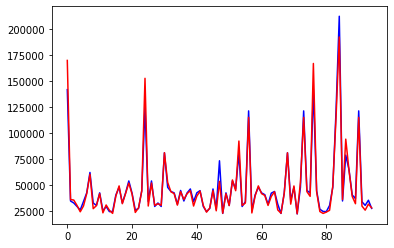

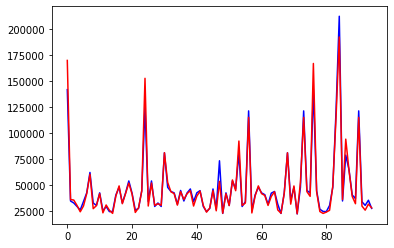

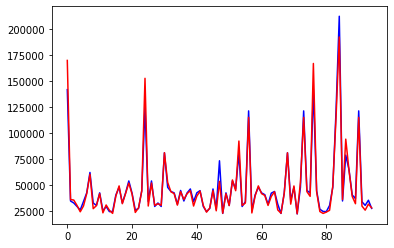

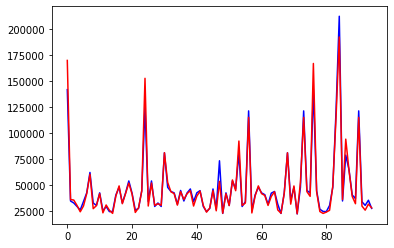

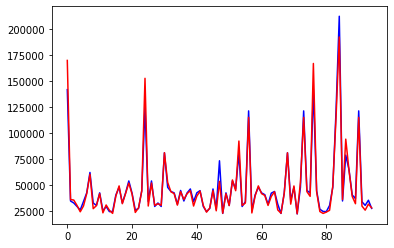

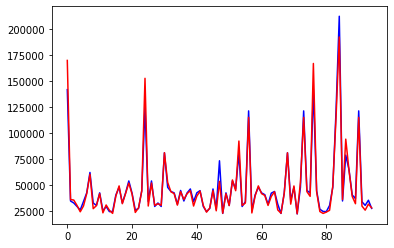

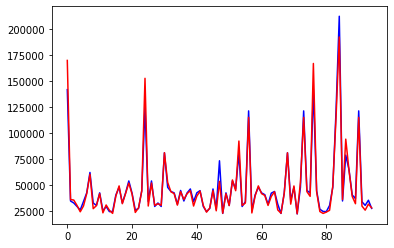

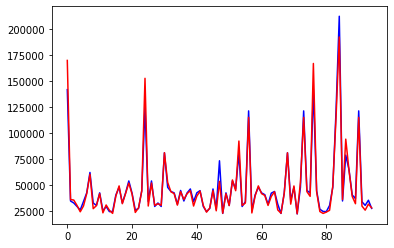

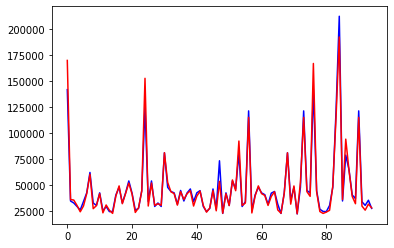

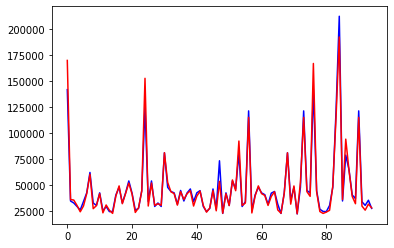

In [56]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(512, input_dim=22, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='linear'))
print(model.summary())
# compile the keras model
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
k = 1 
for train_index, test_index in (cv.split(X)):
    print('*******************Fold number************************: ',k)
    k = k+1    
    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    # fit the keras model on the dataset
    model.fit(X_train_fold, Y_train_fold, epochs=100, batch_size=10, verbose = 2)
    Y_pred_fold = model.predict(X_test_fold)
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')

    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
    
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))   
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))    

# DNN_3

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               5888      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_11 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 5         
Total params: 23,449
Trainable params: 23,449
Non-trainable params: 0
_________________________________________________________________
None
KFold(n_splits=10, random_state=42, shuffle=True)
*******************Fold number************************:  1
(4

Epoch 29/100
 - 0s - loss: 6220.4216 - mae: 6220.4214
Epoch 30/100
 - 0s - loss: 6139.7735 - mae: 6139.7725
Epoch 31/100
 - 0s - loss: 6245.4687 - mae: 6245.4678
Epoch 32/100
 - 0s - loss: 6310.4284 - mae: 6310.4287
Epoch 33/100
 - 0s - loss: 6206.2112 - mae: 6206.2109
Epoch 34/100
 - 0s - loss: 6131.6147 - mae: 6131.6138
Epoch 35/100
 - 0s - loss: 6396.7947 - mae: 6396.7959
Epoch 36/100
 - 0s - loss: 6213.1008 - mae: 6213.1006
Epoch 37/100
 - 0s - loss: 6026.5296 - mae: 6026.5293
Epoch 38/100
 - 0s - loss: 6091.3371 - mae: 6091.3374
Epoch 39/100
 - 0s - loss: 6134.2325 - mae: 6134.2319
Epoch 40/100
 - 0s - loss: 6171.8777 - mae: 6171.8760
Epoch 41/100
 - 0s - loss: 5971.0508 - mae: 5971.0503
Epoch 42/100
 - 0s - loss: 6037.7435 - mae: 6037.7437
Epoch 43/100
 - 0s - loss: 6077.3109 - mae: 6077.3110
Epoch 44/100
 - 0s - loss: 5996.6609 - mae: 5996.6597
Epoch 45/100
 - 0s - loss: 6309.9424 - mae: 6309.9424
Epoch 46/100
 - 0s - loss: 6105.3722 - mae: 6105.3730
Epoch 47/100
 - 0s - loss: 6

Epoch 28/100
 - 0s - loss: 2116.4475 - mae: 2116.4475
Epoch 29/100
 - 0s - loss: 2104.0855 - mae: 2104.0854
Epoch 30/100
 - 0s - loss: 2347.5171 - mae: 2347.5171
Epoch 31/100
 - 0s - loss: 2087.7572 - mae: 2087.7568
Epoch 32/100
 - 0s - loss: 2091.7853 - mae: 2091.7854
Epoch 33/100
 - 0s - loss: 2506.6241 - mae: 2506.6238
Epoch 34/100
 - 0s - loss: 2513.5351 - mae: 2513.5352
Epoch 35/100
 - 0s - loss: 2192.1770 - mae: 2192.1770
Epoch 36/100
 - 0s - loss: 2506.2834 - mae: 2506.2837
Epoch 37/100
 - 0s - loss: 2474.7249 - mae: 2474.7246
Epoch 38/100
 - 0s - loss: 2385.7383 - mae: 2385.7383
Epoch 39/100
 - 0s - loss: 2165.0523 - mae: 2165.0520
Epoch 40/100
 - 0s - loss: 2381.0447 - mae: 2381.0449
Epoch 41/100
 - 0s - loss: 2327.6397 - mae: 2327.6394
Epoch 42/100
 - 0s - loss: 2184.0773 - mae: 2184.0774
Epoch 43/100
 - 0s - loss: 2248.3953 - mae: 2248.3950
Epoch 44/100
 - 0s - loss: 2610.1264 - mae: 2610.1265
Epoch 45/100
 - 0s - loss: 2298.5488 - mae: 2298.5488
Epoch 46/100
 - 0s - loss: 1

Epoch 27/100
 - 0s - loss: 1457.0309 - mae: 1457.0312
Epoch 28/100
 - 0s - loss: 1522.9480 - mae: 1522.9480
Epoch 29/100
 - 0s - loss: 2240.8553 - mae: 2240.8552
Epoch 30/100
 - 0s - loss: 1474.2086 - mae: 1474.2089
Epoch 31/100
 - 0s - loss: 1394.0388 - mae: 1394.0387
Epoch 32/100
 - 0s - loss: 1681.4088 - mae: 1681.4086
Epoch 33/100
 - 0s - loss: 1281.6171 - mae: 1281.6173
Epoch 34/100
 - 0s - loss: 1649.1658 - mae: 1649.1660
Epoch 35/100
 - 0s - loss: 1615.8608 - mae: 1615.8606
Epoch 36/100
 - 0s - loss: 1269.0290 - mae: 1269.0289
Epoch 37/100
 - 0s - loss: 1459.7355 - mae: 1459.7356
Epoch 38/100
 - 0s - loss: 1696.0286 - mae: 1696.0284
Epoch 39/100
 - 0s - loss: 1436.6466 - mae: 1436.6465
Epoch 40/100
 - 0s - loss: 1590.7014 - mae: 1590.7010
Epoch 41/100
 - 0s - loss: 1390.7874 - mae: 1390.7874
Epoch 42/100
 - 0s - loss: 2037.7686 - mae: 2037.7686
Epoch 43/100
 - 0s - loss: 1581.2336 - mae: 1581.2338
Epoch 44/100
 - 0s - loss: 1545.4799 - mae: 1545.4800
Epoch 45/100
 - 0s - loss: 1

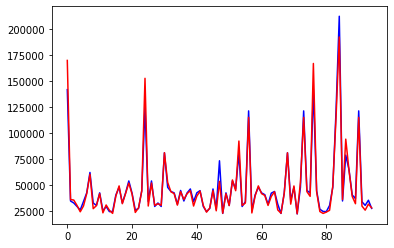

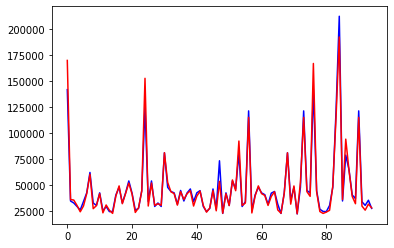

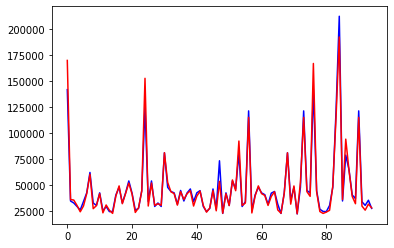

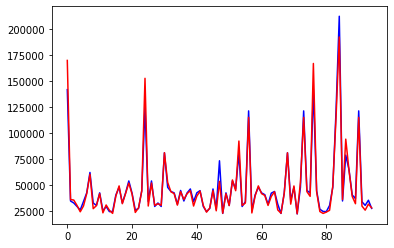

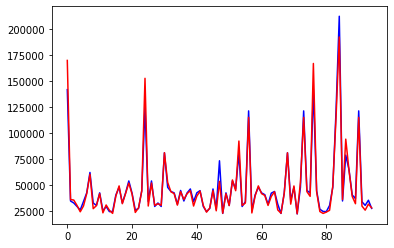

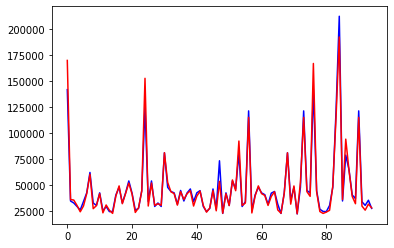

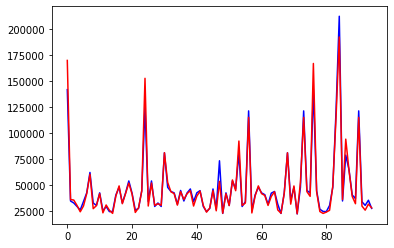

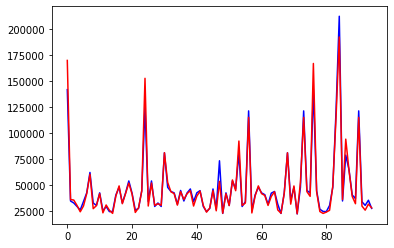

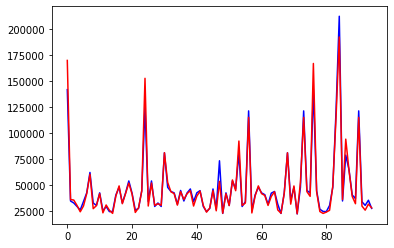

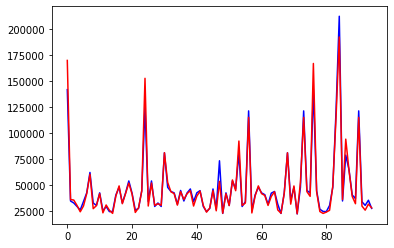

In [57]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(256, input_dim=22, activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(16,  activation='relu'))
model.add(Dense(4,  activation='relu'))
model.add(Dense(1, activation='linear'))
print(model.summary())
# compile the keras model
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
k = 1
for train_index, test_index in (cv.split(X)):
    print('*******************Fold number************************: ',k)
    k = k+1
    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    # fit the keras model on the dataset
    model.fit(X_train_fold, Y_train_fold, epochs=100, batch_size=10, verbose = 2)
    Y_pred_fold = model.predict(X_test_fold)
    plt.figure()
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')

    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores)) 
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores)) 

# DNN_4

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               11776     
_________________________________________________________________
dense_15 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_16 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 18        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 3         
Total params: 81,853
Trainable params: 81,853
Non-trainable params: 0
__________________________________________________

Epoch 23/100
 - 0s - loss: 47374.1996 - mae: 47374.1914
Epoch 24/100
 - 0s - loss: 47374.1566 - mae: 47374.1562
Epoch 25/100
 - 0s - loss: 47374.1128 - mae: 47374.1016
Epoch 26/100
 - 0s - loss: 47374.0705 - mae: 47374.0703
Epoch 27/100
 - 0s - loss: 47374.0274 - mae: 47374.0273
Epoch 28/100
 - 0s - loss: 47373.9845 - mae: 47373.9844
Epoch 29/100
 - 0s - loss: 47373.9415 - mae: 47373.9570
Epoch 30/100
 - 0s - loss: 47373.8979 - mae: 47373.8906
Epoch 31/100
 - 0s - loss: 47373.8554 - mae: 47373.8555
Epoch 32/100
 - 0s - loss: 47373.8124 - mae: 47373.7969
Epoch 33/100
 - 0s - loss: 47373.7696 - mae: 47373.7617
Epoch 34/100
 - 0s - loss: 47373.7266 - mae: 47373.7344
Epoch 35/100
 - 0s - loss: 47373.6833 - mae: 47373.6797
Epoch 36/100
 - 0s - loss: 47373.6413 - mae: 47373.6562
Epoch 37/100
 - 0s - loss: 47373.5974 - mae: 47373.5938
Epoch 38/100
 - 0s - loss: 47373.5543 - mae: 47373.5586
Epoch 39/100
 - 0s - loss: 47373.5114 - mae: 47373.5000
Epoch 40/100
 - 0s - loss: 47373.4687 - mae: 473

Epoch 68/100
 - 0s - loss: 47822.0281 - mae: 47822.0273
Epoch 69/100
 - 0s - loss: 47821.9852 - mae: 47821.9844
Epoch 70/100
 - 0s - loss: 47821.9434 - mae: 47821.9297
Epoch 71/100
 - 0s - loss: 47821.8997 - mae: 47821.9141
Epoch 72/100
 - 0s - loss: 47821.8570 - mae: 47821.8555
Epoch 73/100
 - 0s - loss: 47821.8139 - mae: 47821.8203
Epoch 74/100
 - 0s - loss: 47821.7704 - mae: 47821.7617
Epoch 75/100
 - 0s - loss: 47821.7279 - mae: 47821.7227
Epoch 76/100
 - 0s - loss: 47821.6848 - mae: 47821.6797
Epoch 77/100
 - 0s - loss: 47821.6424 - mae: 47821.6289
Epoch 78/100
 - 0s - loss: 47821.5992 - mae: 47821.6172
Epoch 79/100
 - 0s - loss: 47821.5556 - mae: 47821.5547
Epoch 80/100
 - 0s - loss: 47821.5134 - mae: 47821.5273
Epoch 81/100
 - 0s - loss: 47821.4694 - mae: 47821.4609
Epoch 82/100
 - 0s - loss: 47821.4260 - mae: 47821.4258
Epoch 83/100
 - 0s - loss: 47821.3839 - mae: 47821.3789
Epoch 84/100
 - 0s - loss: 47821.3399 - mae: 47821.3320
Epoch 85/100
 - 0s - loss: 47821.2973 - mae: 478

Epoch 12/100
 - 0s - loss: 47115.5638 - mae: 47115.5586
Epoch 13/100
 - 0s - loss: 47115.5215 - mae: 47115.5312
Epoch 14/100
 - 0s - loss: 47115.4781 - mae: 47115.4766
Epoch 15/100
 - 0s - loss: 47115.4352 - mae: 47115.4531
Epoch 16/100
 - 0s - loss: 47115.3919 - mae: 47115.3906
Epoch 17/100
 - 0s - loss: 47115.3491 - mae: 47115.3477
Epoch 18/100
 - 0s - loss: 47115.3069 - mae: 47115.2891
Epoch 19/100
 - 0s - loss: 47115.2634 - mae: 47115.2539
Epoch 20/100
 - 0s - loss: 47115.2197 - mae: 47115.2266
Epoch 21/100
 - 0s - loss: 47115.1781 - mae: 47115.1719
Epoch 22/100
 - 0s - loss: 47115.1345 - mae: 47115.1484
Epoch 23/100
 - 0s - loss: 47115.0917 - mae: 47115.0898
Epoch 24/100
 - 0s - loss: 47115.0478 - mae: 47115.0508
Epoch 25/100
 - 0s - loss: 47115.0059 - mae: 47114.9922
Epoch 26/100
 - 0s - loss: 47114.9625 - mae: 47114.9609
Epoch 27/100
 - 0s - loss: 47114.9189 - mae: 47114.9336
Epoch 28/100
 - 0s - loss: 47114.8763 - mae: 47114.8672
Epoch 29/100
 - 0s - loss: 47114.8336 - mae: 471

Epoch 57/100
 - 0s - loss: 47338.0581 - mae: 47338.0742
Epoch 58/100
 - 0s - loss: 47338.0158 - mae: 47338.0156
Epoch 59/100
 - 0s - loss: 47337.9733 - mae: 47337.9766
Epoch 60/100
 - 0s - loss: 47337.9295 - mae: 47337.9141
Epoch 61/100
 - 0s - loss: 47337.8867 - mae: 47337.8789
Epoch 62/100
 - 0s - loss: 47337.8441 - mae: 47337.8477
Epoch 63/100
 - 0s - loss: 47337.8007 - mae: 47337.7930
Epoch 64/100
 - 0s - loss: 47337.7579 - mae: 47337.7773
Epoch 65/100
 - 0s - loss: 47337.7156 - mae: 47337.7148
Epoch 66/100
 - 0s - loss: 47337.6714 - mae: 47337.6836
Epoch 67/100
 - 0s - loss: 47337.6283 - mae: 47337.6172
Epoch 68/100
 - 0s - loss: 47337.5854 - mae: 47337.5859
Epoch 69/100
 - 0s - loss: 47337.5428 - mae: 47337.5391
Epoch 70/100
 - 0s - loss: 47337.4995 - mae: 47337.4961
Epoch 71/100
 - 0s - loss: 47337.4572 - mae: 47337.4766
Epoch 72/100
 - 0s - loss: 47337.4133 - mae: 47337.4219
Epoch 73/100
 - 0s - loss: 47337.3719 - mae: 47337.3711
Epoch 74/100
 - 0s - loss: 47337.3282 - mae: 473

Epoch 45/100
 - 0s - loss: 48682.1975 - mae: 48682.1953
Epoch 46/100
 - 0s - loss: 48682.1548 - mae: 48682.1484
Epoch 47/100
 - 0s - loss: 48682.1117 - mae: 48682.0977
Epoch 48/100
 - 0s - loss: 48682.0691 - mae: 48682.0781
Epoch 49/100
 - 0s - loss: 48682.0254 - mae: 48682.0312
Epoch 50/100
 - 0s - loss: 48681.9831 - mae: 48681.9961
Epoch 51/100
 - 0s - loss: 48681.9403 - mae: 48681.9297
Epoch 52/100
 - 0s - loss: 48681.8966 - mae: 48681.8984
Epoch 53/100
 - 0s - loss: 48681.8543 - mae: 48681.8477
Epoch 54/100
 - 0s - loss: 48681.8108 - mae: 48681.8047
Epoch 55/100
 - 0s - loss: 48681.7683 - mae: 48681.7812
Epoch 56/100
 - 0s - loss: 48681.7255 - mae: 48681.7227
Epoch 57/100
 - 0s - loss: 48681.6820 - mae: 48681.6914
Epoch 58/100
 - 0s - loss: 48681.6394 - mae: 48681.6367
Epoch 59/100
 - 0s - loss: 48681.5962 - mae: 48681.5977
Epoch 60/100
 - 0s - loss: 48681.5526 - mae: 48681.5430
Epoch 61/100
 - 0s - loss: 48681.5095 - mae: 48681.4961
Epoch 62/100
 - 0s - loss: 48681.4671 - mae: 486

Epoch 90/100
 - 0s - loss: 47899.3216 - mae: 47899.3359
Epoch 91/100
 - 0s - loss: 47899.2784 - mae: 47899.2812
Epoch 92/100
 - 0s - loss: 47899.2350 - mae: 47899.2422
Epoch 93/100
 - 0s - loss: 47899.1920 - mae: 47899.1914
Epoch 94/100
 - 0s - loss: 47899.1499 - mae: 47899.1484
Epoch 95/100
 - 0s - loss: 47899.1057 - mae: 47899.0938
Epoch 96/100
 - 0s - loss: 47899.0631 - mae: 47899.0547
Epoch 97/100
 - 0s - loss: 47899.0207 - mae: 47899.0391
Epoch 98/100
 - 0s - loss: 47898.9772 - mae: 47898.9727
Epoch 99/100
 - 0s - loss: 47898.9342 - mae: 47898.9531
Epoch 100/100
 - 0s - loss: 47898.8914 - mae: 47898.8828
MSE for 10 folds
 [2285837660.7157927, 4155869282.347559, 3228991121.6482506, 3734567393.4018025, 4712469786.553163, 4257574052.171597, 4381390172.14183, 1925865260.776813, 2220565199.39294, 3661970323.74334]

R2 scores for 10 folds
 [-3.512054239088638, -1.93427923732124, -2.6022675034427474, -1.832550306450357, -1.7079223834670971, -1.8535480648226565, -1.4856007604065091, -6.06

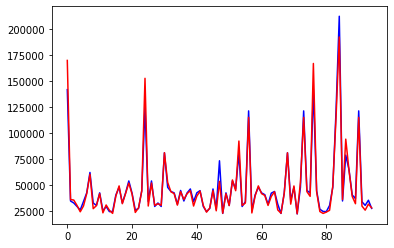

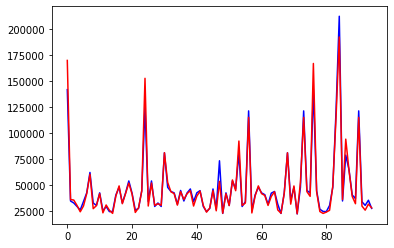

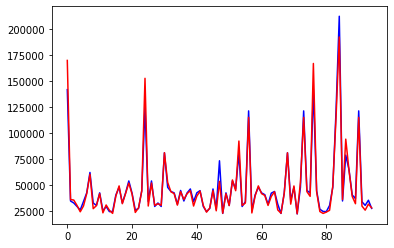

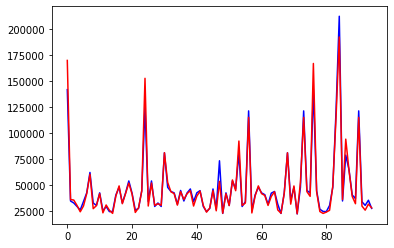

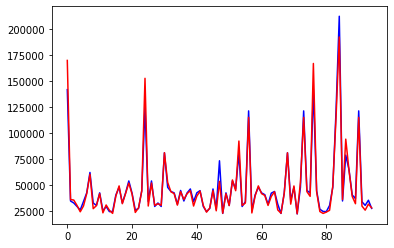

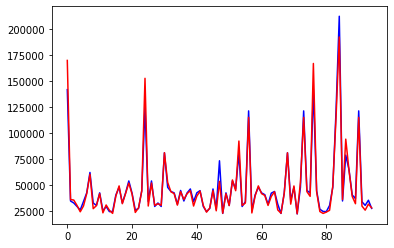

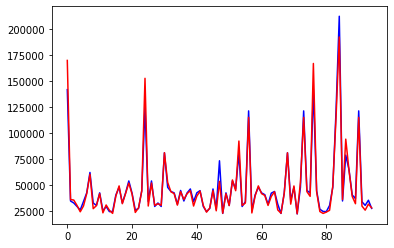

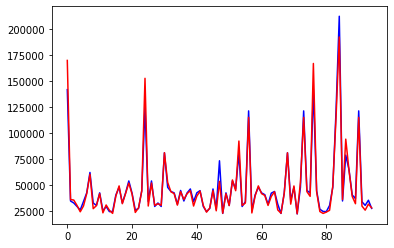

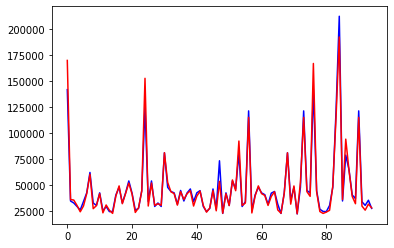

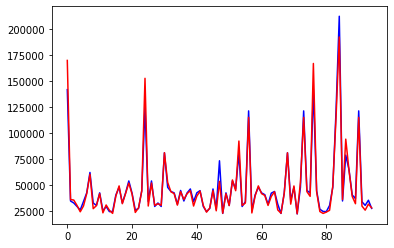

In [58]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(512, input_dim=22, activation='relu'))
model.add(Dense(128,  activation='relu'))
model.add(Dense(32,  activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(2,  activation='relu'))
model.add(Dense(1, activation='linear'))
print(model.summary())
# compile the keras model
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
k = 1
for train_index, test_index in (cv.split(X)):
    print('*******************Fold number************************: ',k)
    k = k+1
    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    # fit the keras model on the dataset
    model.fit(X_train_fold, Y_train_fold, epochs=100, batch_size=10, verbose = 2)
    Y_pred_fold = model.predict(X_test_fold)
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')

    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores)) 
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores)) 

In [4]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(512, input_dim=22, activation='relu'))
model.add(Dense(1, activation='linear'))
print('Model 1 DNN: dnn_1')
print(model.summary())

# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(512, input_dim=22, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='linear'))
print('Model 2 DNN: dnn_2')
print(model.summary())

# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(256, input_dim=22, activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(16,  activation='relu'))
model.add(Dense(4,  activation='relu'))
model.add(Dense(1, activation='linear'))
print('Model 3 DNN: dnn_3')
print(model.summary())

# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(512, input_dim=22, activation='relu'))
model.add(Dense(128,  activation='relu'))
model.add(Dense(32,  activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(2,  activation='relu'))
model.add(Dense(1, activation='linear'))
print('Model 4 DNN: dnn_4')
print(model.summary())


Model 1 DNN: dnn_1
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 512)               11776     
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 513       
Total params: 12,289
Trainable params: 12,289
Non-trainable params: 0
_________________________________________________________________
None
Model 2 DNN: dnn_2
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               11776     
_________________________________________________________________
dense_23 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_24 (Dense)             (None, 512)           